In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
pd.set_option('display.max_rows', 2000)

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
df.shape

(1460, 81)

In [7]:
df.isnull().head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  False       False     False        False    False   False   True     False   
1  False       False     False        False    False   False   True     False   
2  False       False     False        False    False   False   True     False   
3  False       False     False        False    False   False   True     False   
4  False       False     False        False    False   False   True     False   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0        False      False  ...     False    True   True         True    False   
1        False      False  ...     False    True   True         True    False   
2        False      False  ...     False    True   True         True    False   
3        False      False  ...     False    True   True         True    False   
4        False      False  ...     False    True   True         True    False   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0   False   False     False          False      False  
1   False   False     False          False      False  
2   False   False     False          False      False  
3   False   False     False          False      False  
4   False   False     False          False      False  

[5 rows x 81 columns]

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

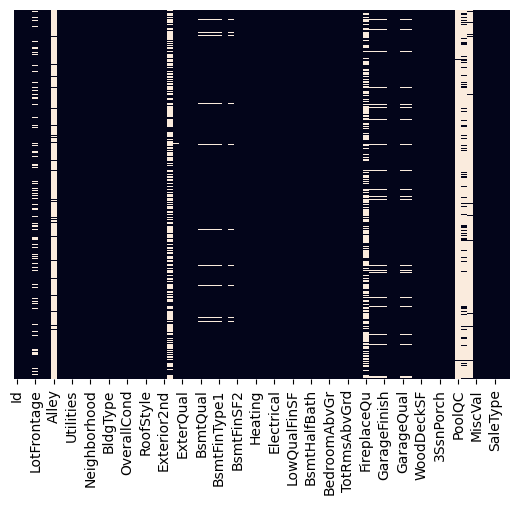

In [9]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
df.drop(['Alley'], axis=1,inplace=True)

In [13]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [14]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinSF2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [15]:
df.drop(['Id', 'PoolQC', 'Fence','MiscFeature','BsmtFinSF2'], axis=1, inplace=True)

In [16]:
df.shape

(1460, 75)

In [17]:
df.columns.values


array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
     

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
def category_onehot_multcols(multcolumns):
    final_df = df
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [20]:
original_dataset = df.copy()

In [21]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [27]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

In [28]:
numerical_cols = []

In [29]:
for column in df:
    if df[column].dtypes is not object:
        numerical_cols.append(column)

In [30]:
numerical_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch'

In [31]:
# plt.scatter(x = 'MSSubClass', y = 'SalePrice', data = df)

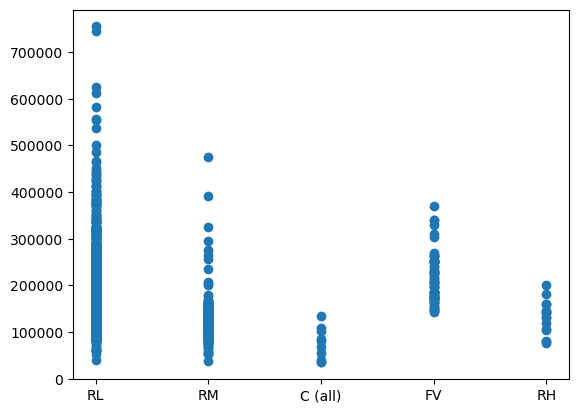

In [32]:
plt.scatter(x = 'MSZoning', y = 'SalePrice', data = df)

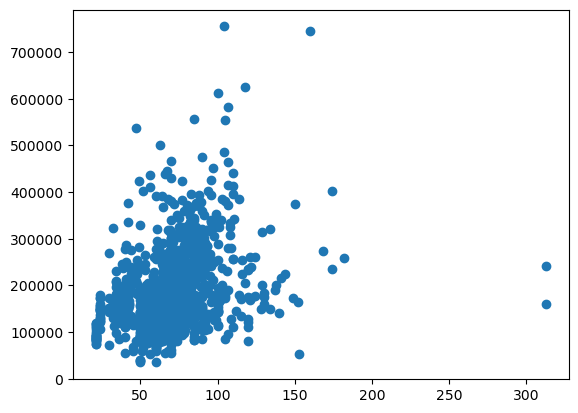

In [33]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df)

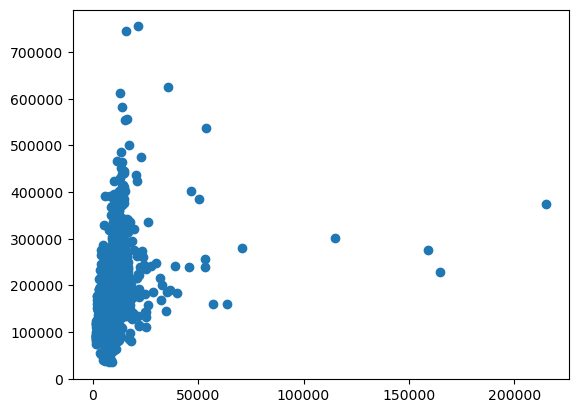

In [34]:
plt.scatter(x = 'LotArea', y = 'SalePrice', data = df)

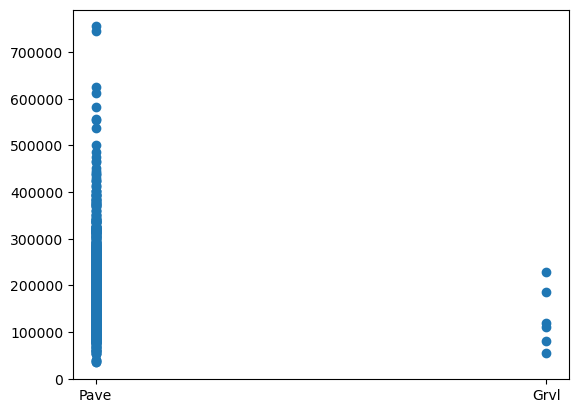

In [35]:
plt.scatter(x = 'Street', y = 'SalePrice', data = df)

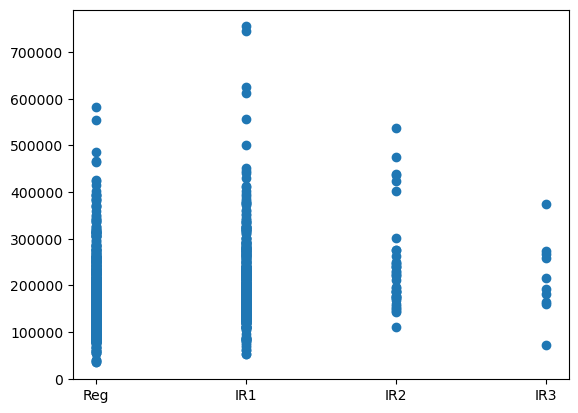

In [36]:
plt.scatter(x = 'LotShape', y = 'SalePrice', data = df)

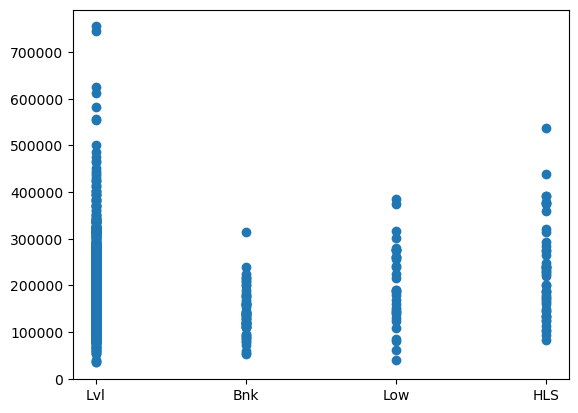

In [37]:
plt.scatter(x = 'LandContour', y = 'SalePrice', data = df)

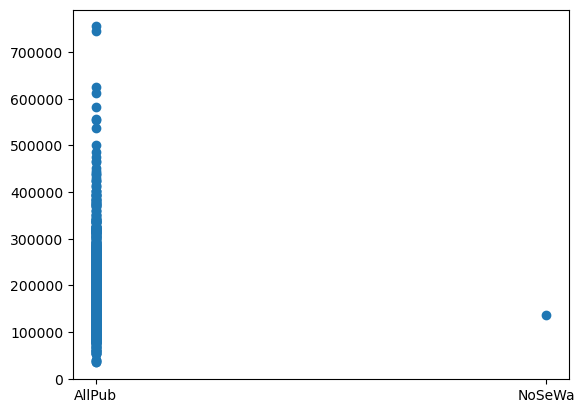

In [38]:
plt.scatter(x = 'Utilities', y = 'SalePrice', data = df)

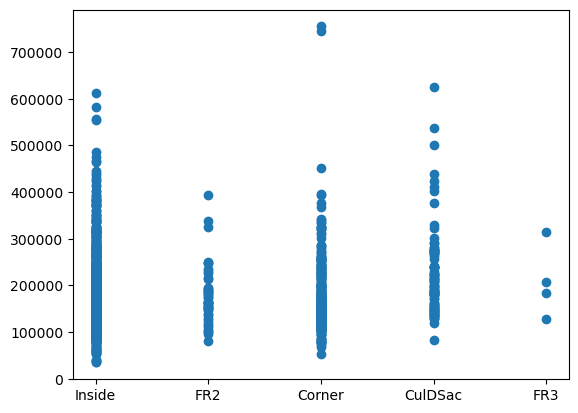

In [39]:
plt.scatter(x = 'LotConfig', y = 'SalePrice', data = df)

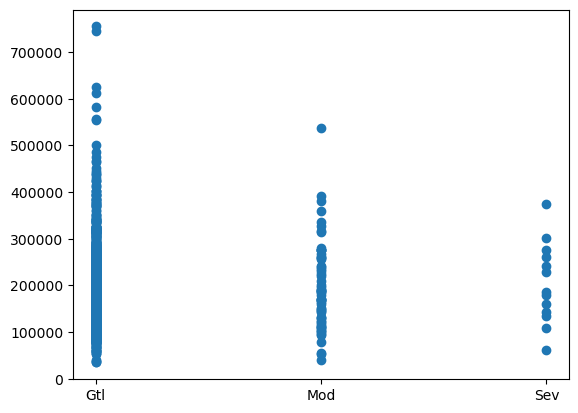

In [40]:
plt.scatter(x = 'LandSlope', y = 'SalePrice', data = df)

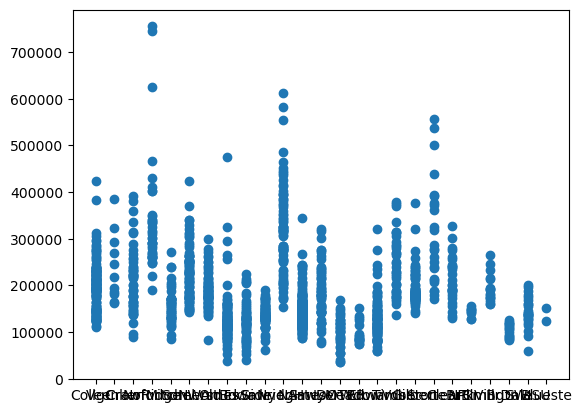

In [41]:
plt.scatter(x = 'Neighborhood', y = 'SalePrice', data = df)

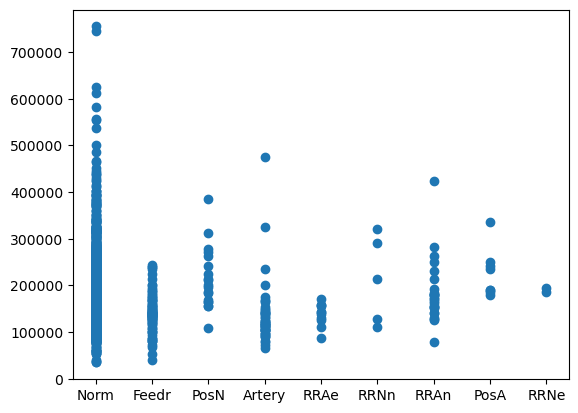

In [42]:
plt.scatter(x = 'Condition1', y = 'SalePrice', data = df)

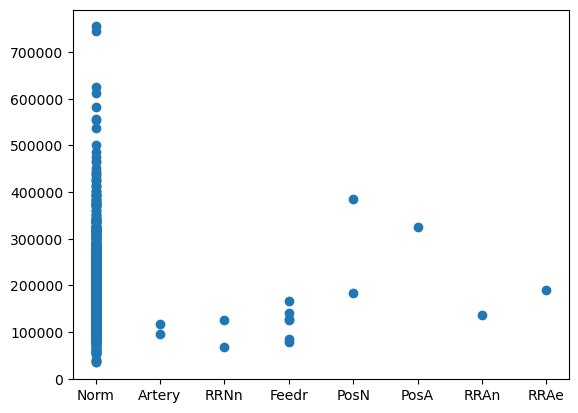

In [43]:
plt.scatter(x = 'Condition2', y = 'SalePrice', data = df)

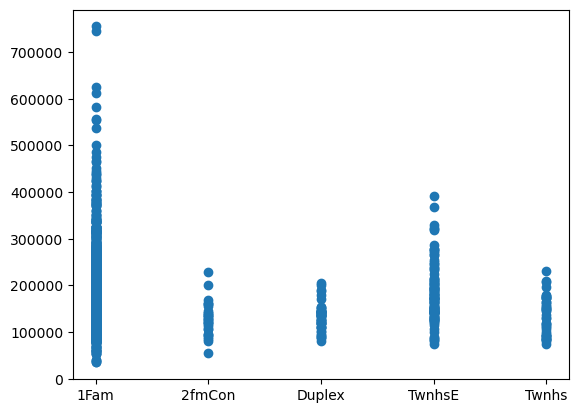

In [44]:
plt.scatter(x = 'BldgType', y = 'SalePrice', data = df)

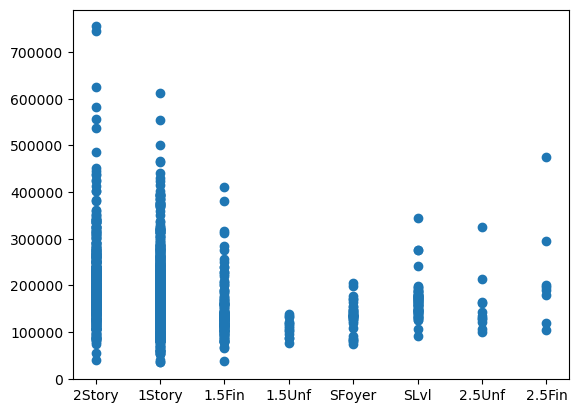

In [45]:
plt.scatter(x = 'HouseStyle', y = 'SalePrice', data = df)

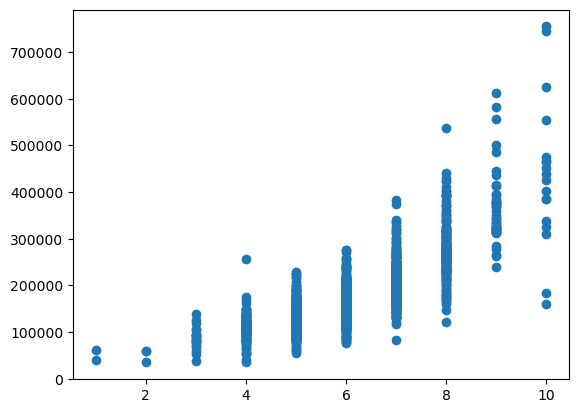

In [46]:
plt.scatter(x = 'OverallQual', y = 'SalePrice', data = df)

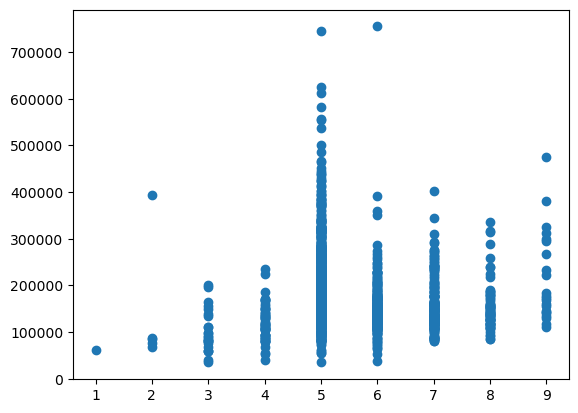

In [47]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data = df)

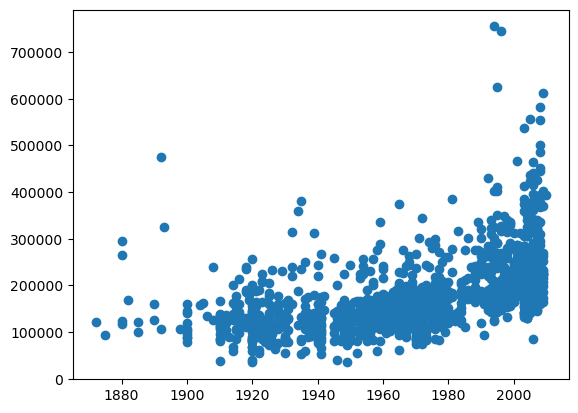

In [48]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = df)

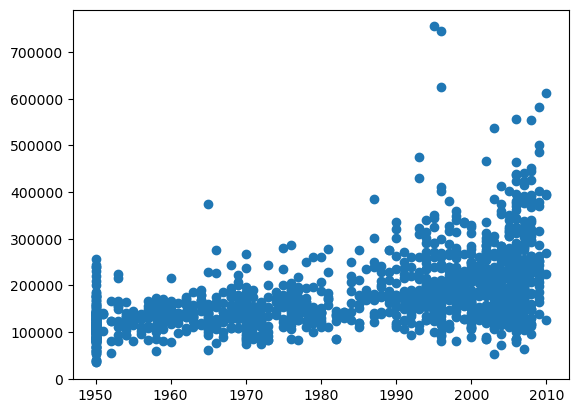

In [49]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df)

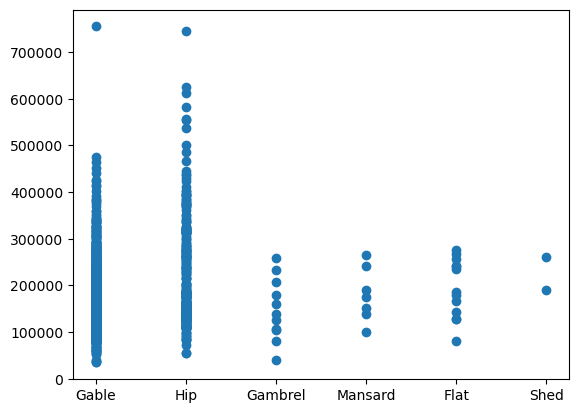

In [50]:
plt.scatter(x = 'RoofStyle', y = 'SalePrice', data = df)

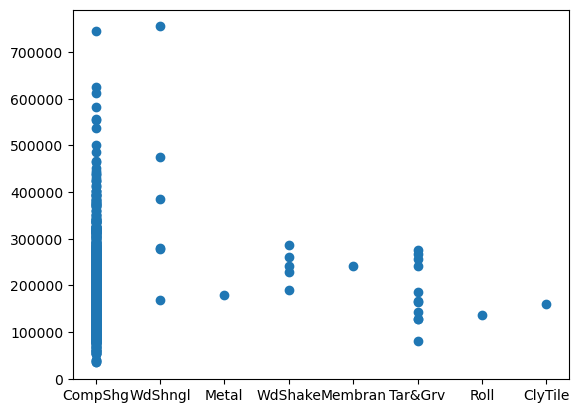

In [51]:
plt.scatter(x = 'RoofMatl', y = 'SalePrice', data = df)

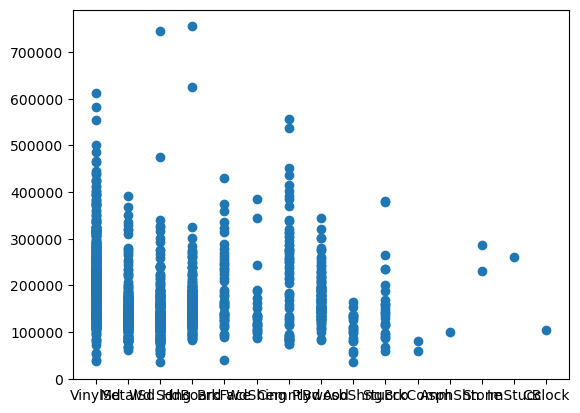

In [52]:
plt.scatter(x = 'Exterior1st', y = 'SalePrice', data = df)

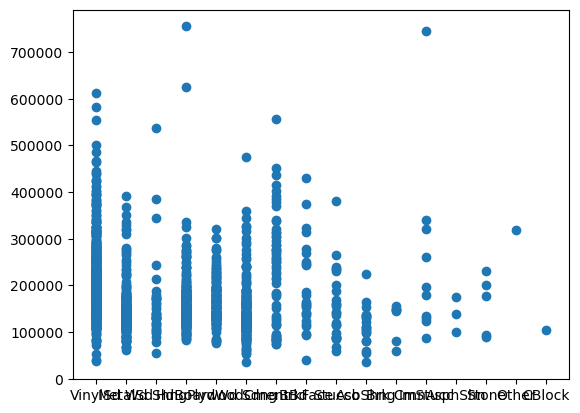

In [53]:
plt.scatter(x = 'Exterior2nd', y = 'SalePrice', data = df)

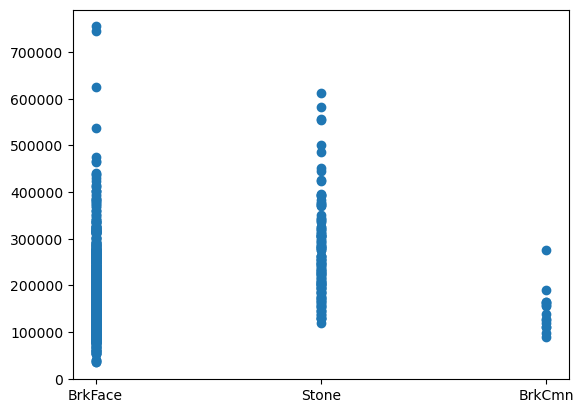

In [54]:
plt.scatter(x = 'MasVnrType', y = 'SalePrice', data = df)

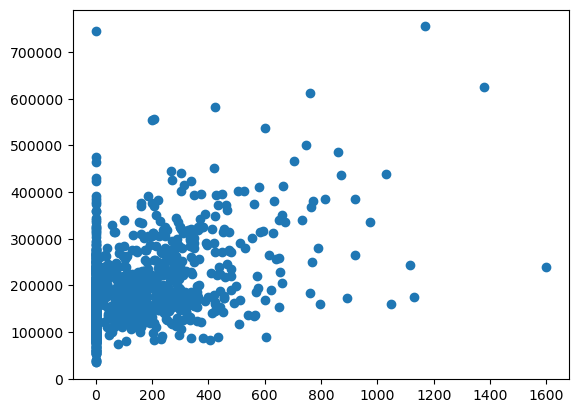

In [55]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df)

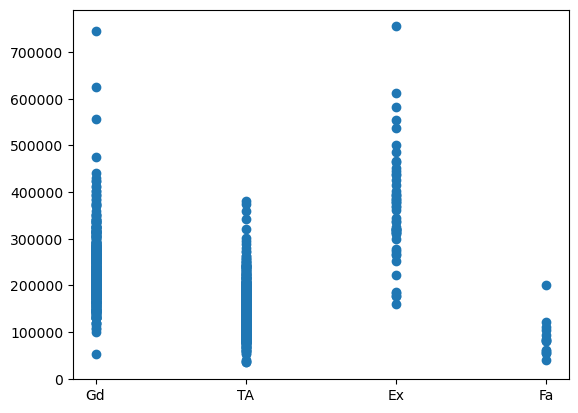

In [56]:
plt.scatter(x = 'ExterQual', y = 'SalePrice', data = df)

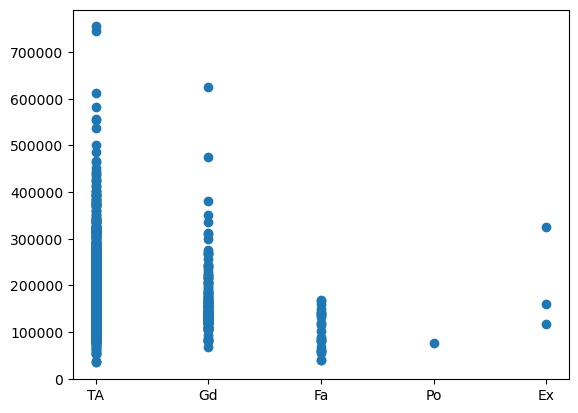

In [57]:
plt.scatter(x = 'ExterCond', y = 'SalePrice', data = df)

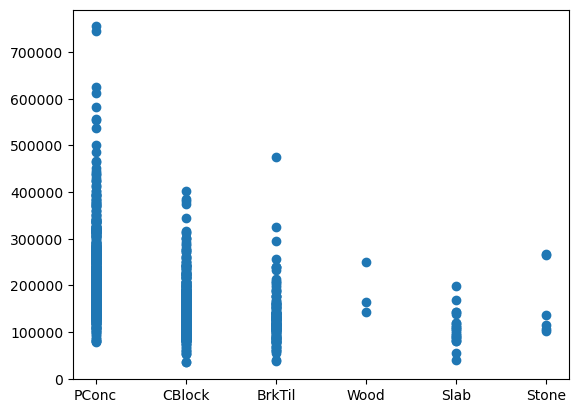

In [58]:
plt.scatter(x = 'Foundation', y = 'SalePrice', data = df)

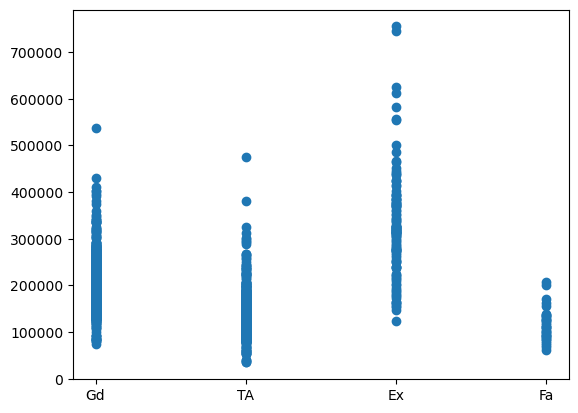

In [59]:
plt.scatter(x = 'BsmtQual', y = 'SalePrice', data = df)

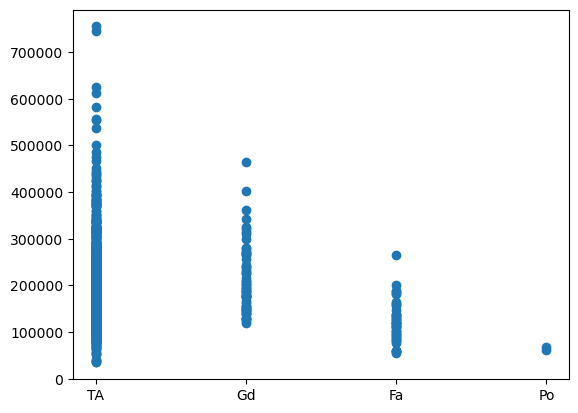

In [60]:
plt.scatter(x = 'BsmtCond', y = 'SalePrice', data = df)

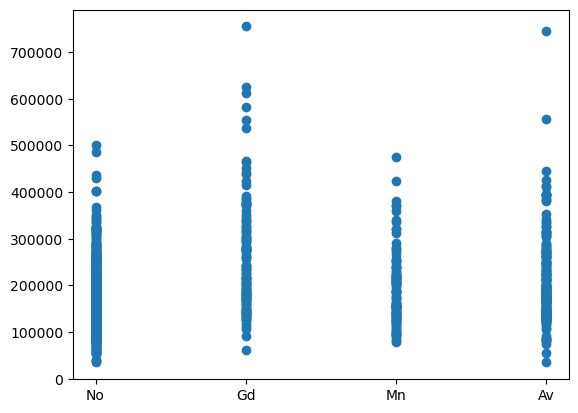

In [61]:
plt.scatter(x = 'BsmtExposure', y = 'SalePrice', data = df)

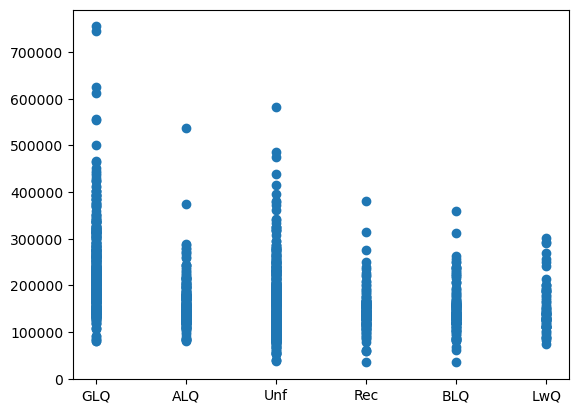

In [62]:
plt.scatter(x = 'BsmtFinType1', y = 'SalePrice', data = df)

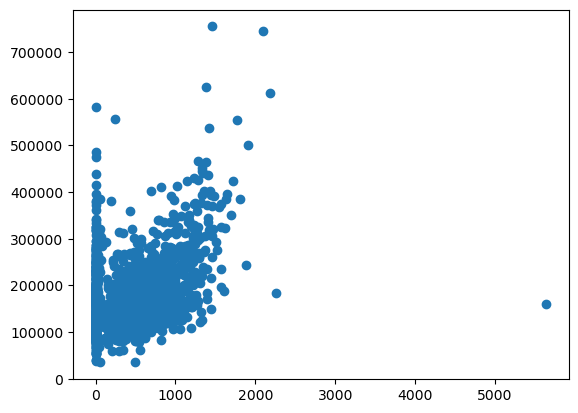

In [63]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = df)

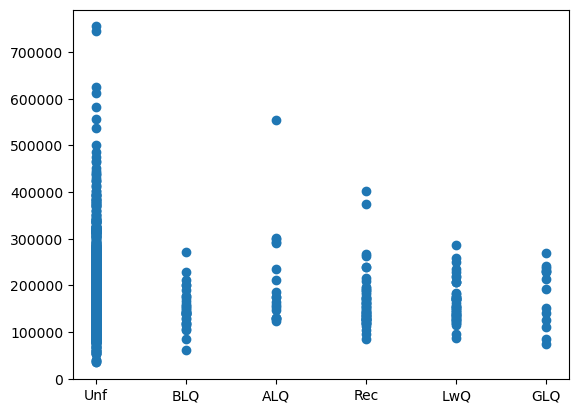

In [64]:
plt.scatter(x = 'BsmtFinType2', y = 'SalePrice', data = df)

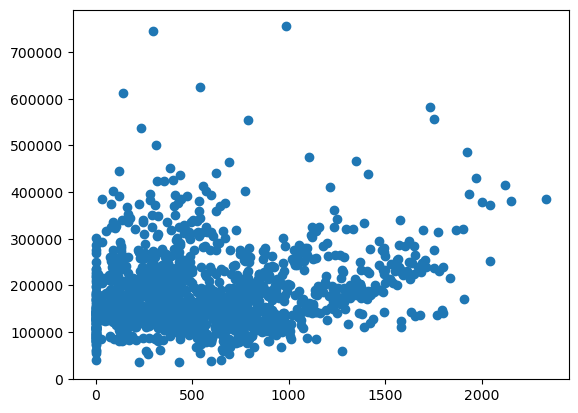

In [65]:
plt.scatter(x = 'BsmtUnfSF', y = 'SalePrice', data = df)

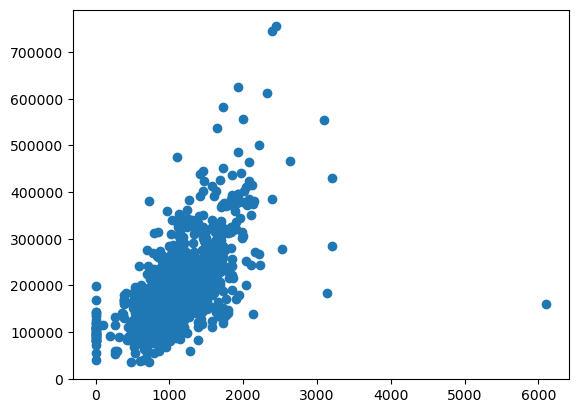

In [66]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df)

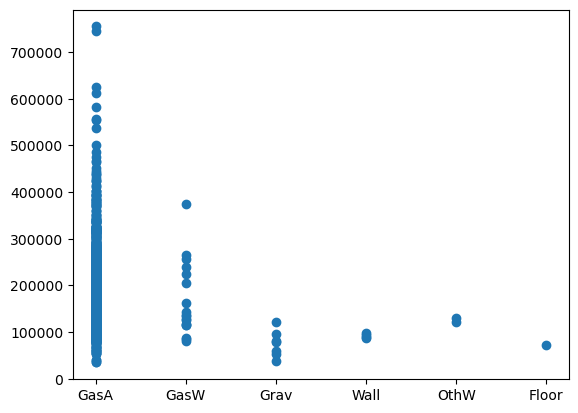

In [67]:
plt.scatter(x = 'Heating', y = 'SalePrice', data = df)

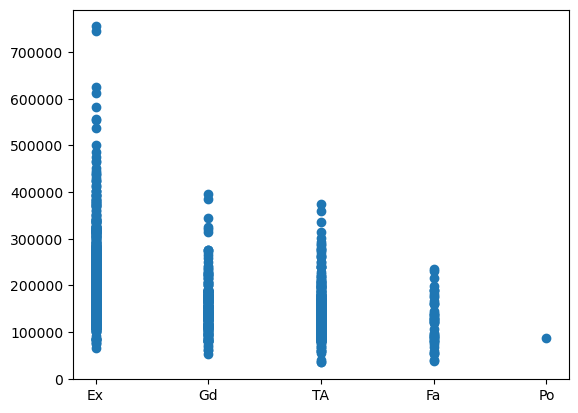

In [68]:
plt.scatter(x = 'HeatingQC', y = 'SalePrice', data = df)

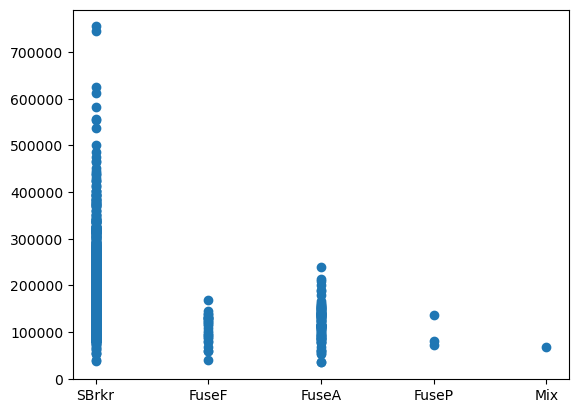

In [69]:
plt.scatter(x = 'Electrical', y = 'SalePrice', data = df)

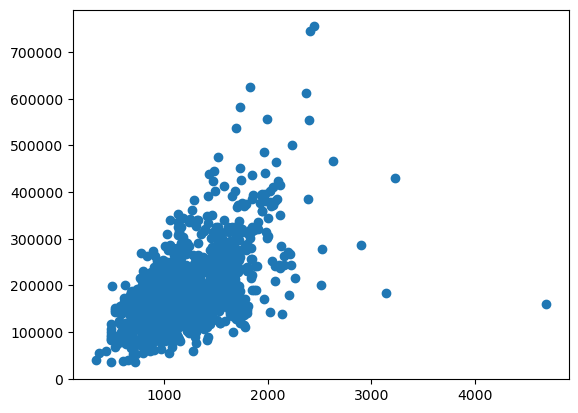

In [70]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = df)

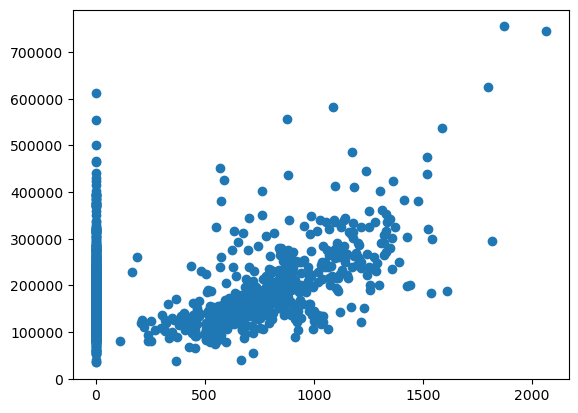

In [71]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = df)

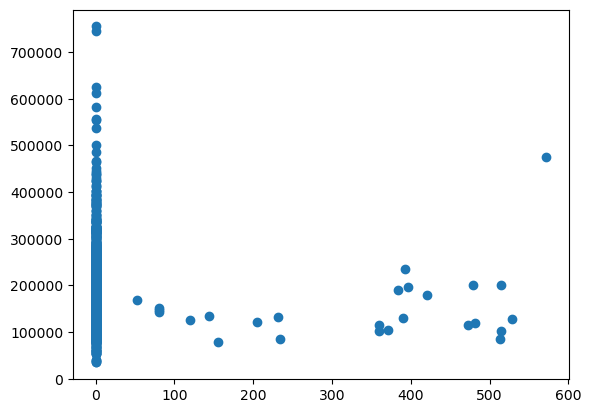

In [72]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = df)

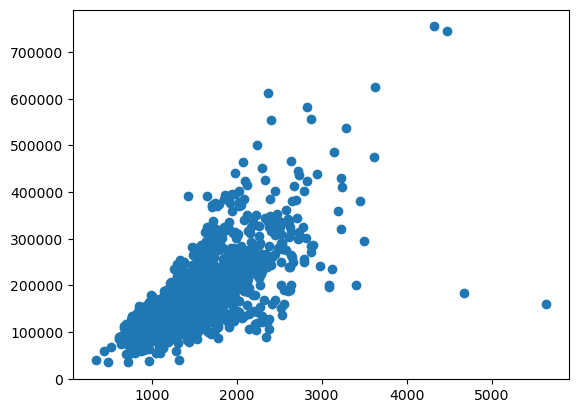

In [73]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df)

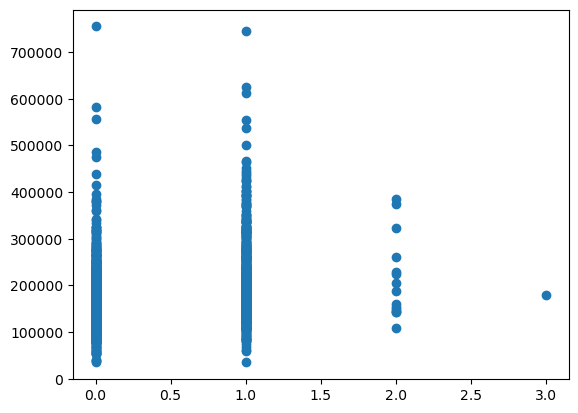

In [74]:
plt.scatter(x = 'BsmtFullBath', y = 'SalePrice', data = df)

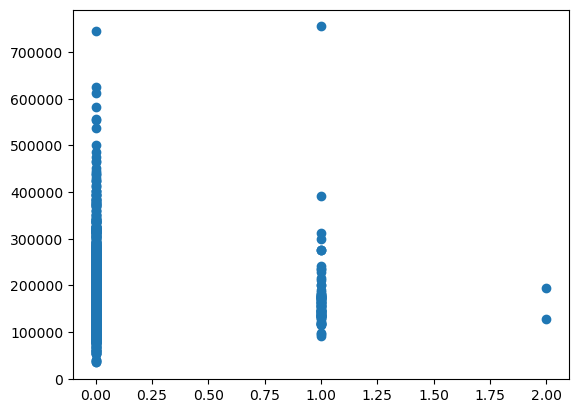

In [75]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = df)

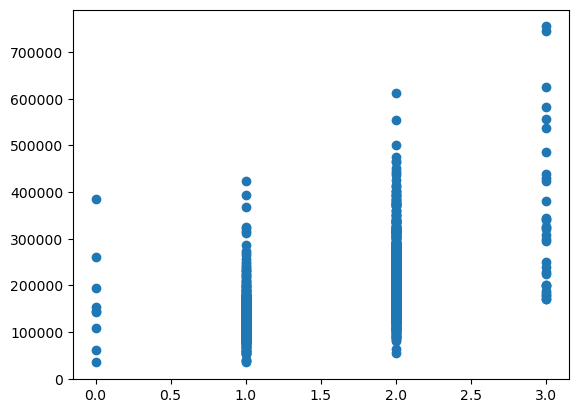

In [76]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data = df)

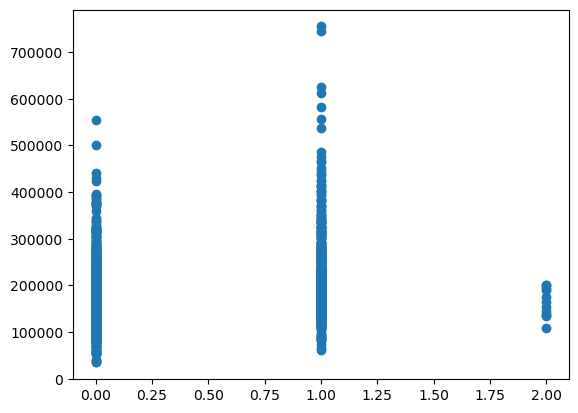

In [77]:
plt.scatter(x = 'HalfBath', y = 'SalePrice', data = df)

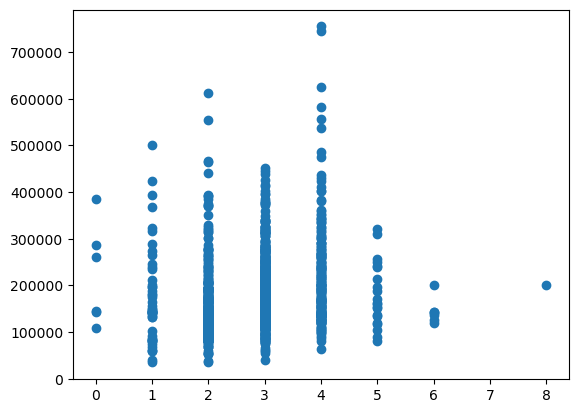

In [78]:
plt.scatter(x = 'BedroomAbvGr', y = 'SalePrice', data = df)

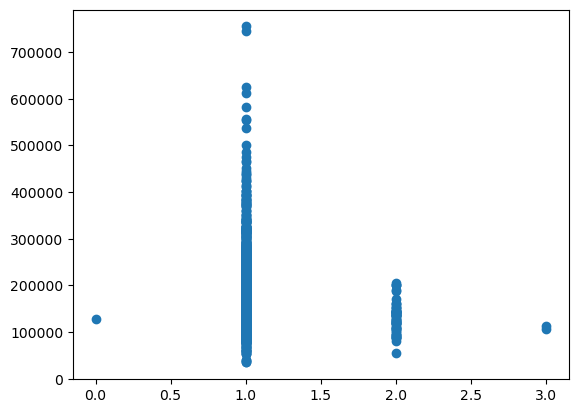

In [79]:
plt.scatter(x = 'KitchenAbvGr', y = 'SalePrice', data = df)

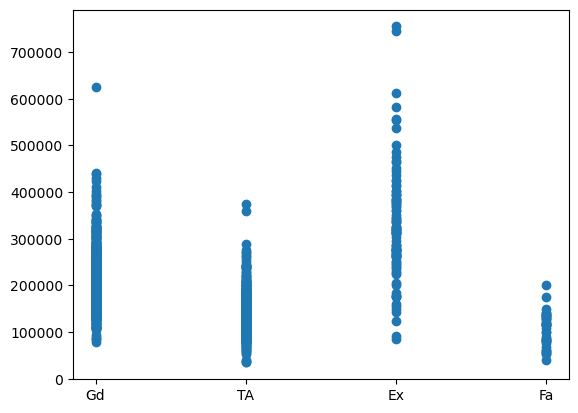

In [80]:
plt.scatter(x = 'KitchenQual', y = 'SalePrice', data = df)

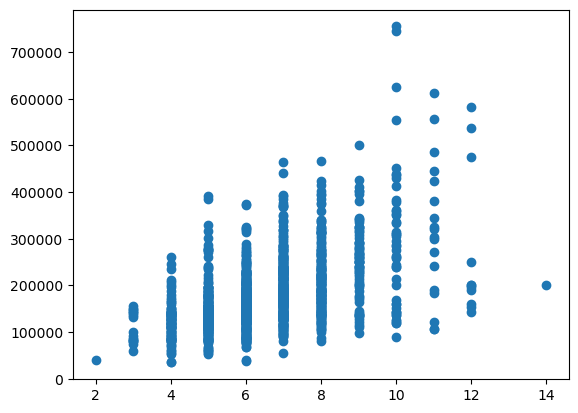

In [81]:
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df)

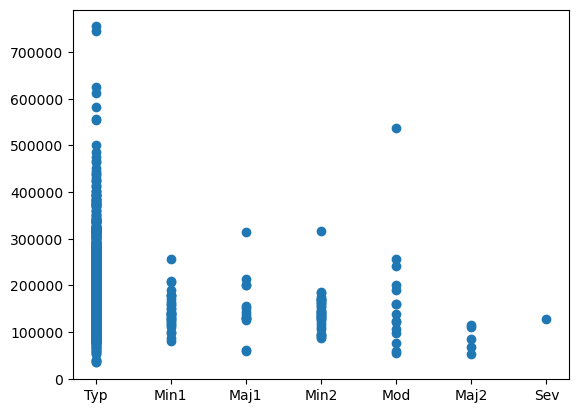

In [82]:
plt.scatter(x = 'Functional', y = 'SalePrice', data = df)

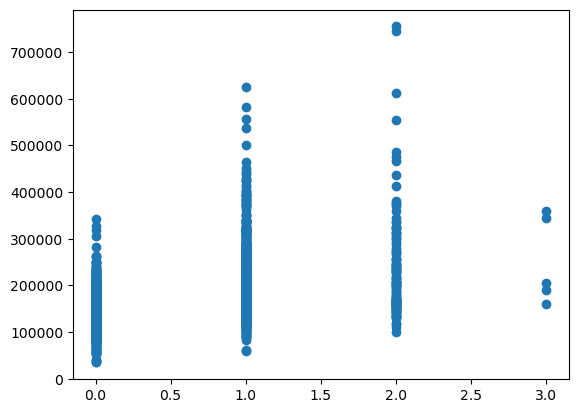

In [83]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data = df)

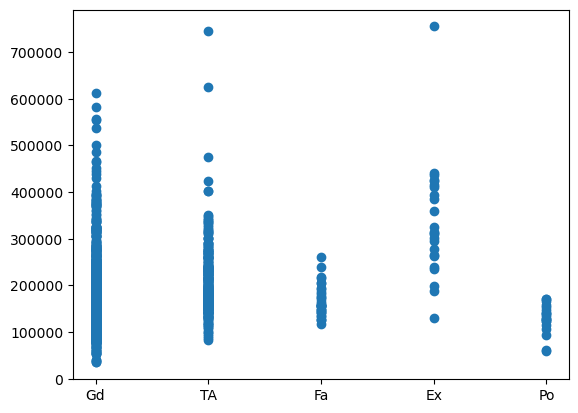

In [84]:
plt.scatter(x = 'FireplaceQu', y = 'SalePrice', data = df)

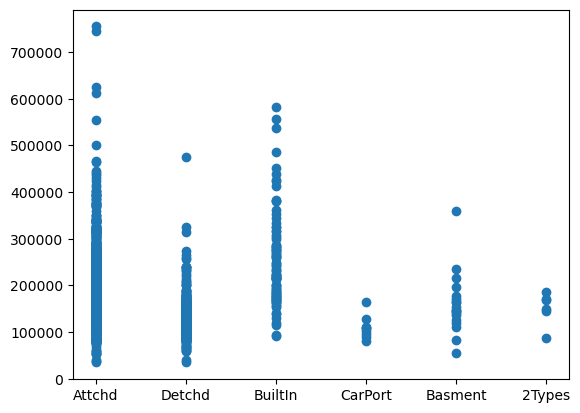

In [85]:
plt.scatter(x = 'GarageType', y = 'SalePrice', data = df)

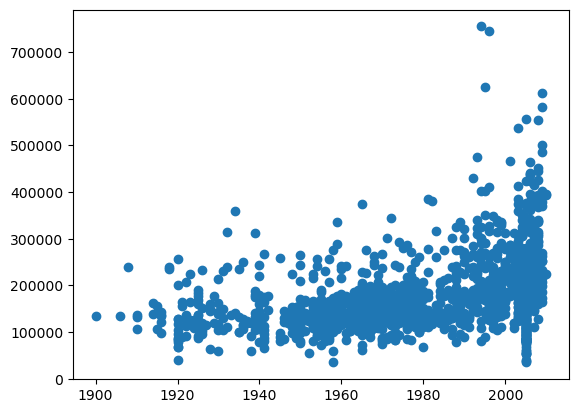

In [86]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = df)

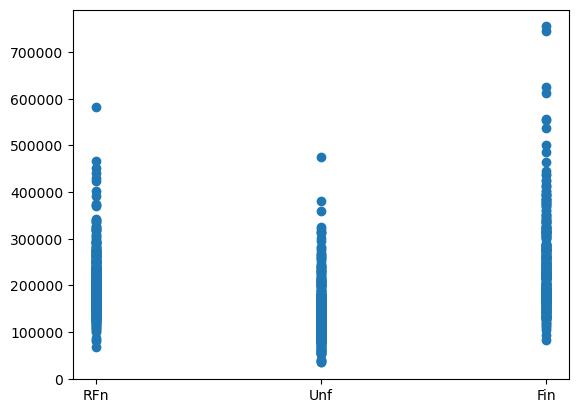

In [87]:
plt.scatter(x = 'GarageFinish', y = 'SalePrice', data = df)

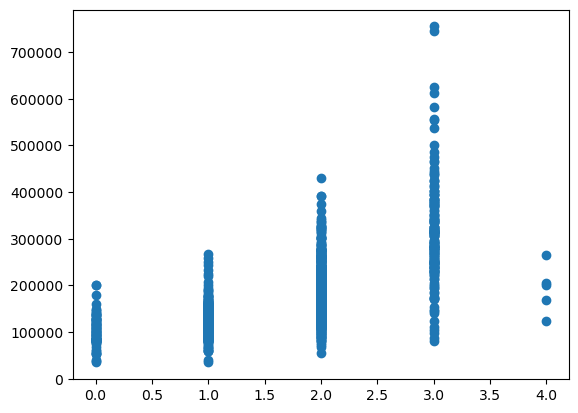

In [88]:
plt.scatter(x = 'GarageCars', y = 'SalePrice', data = df)

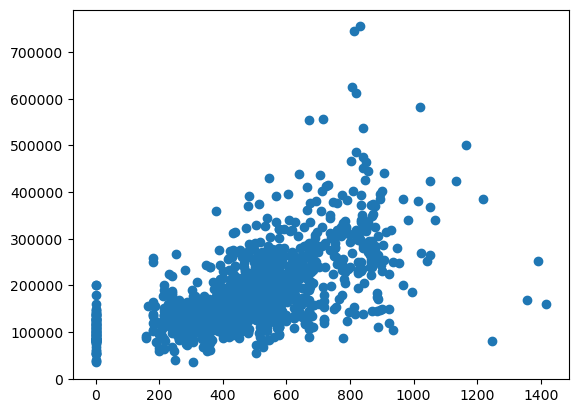

In [89]:
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df)

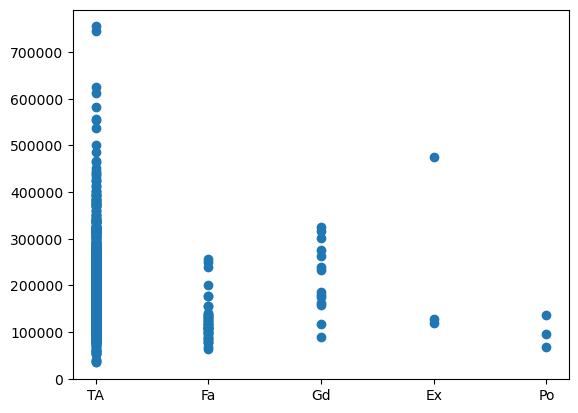

In [90]:
plt.scatter(x = 'GarageQual', y = 'SalePrice', data = df)

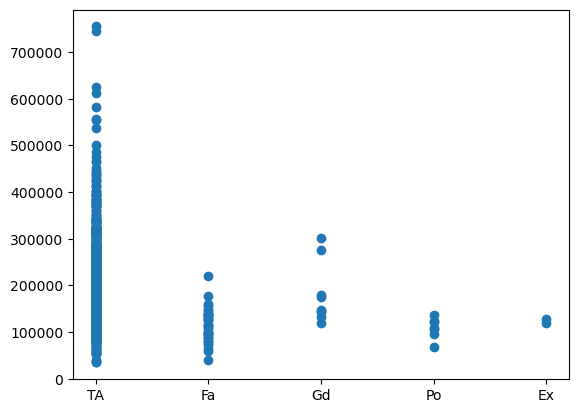

In [91]:
plt.scatter(x = 'GarageCond', y = 'SalePrice', data = df)

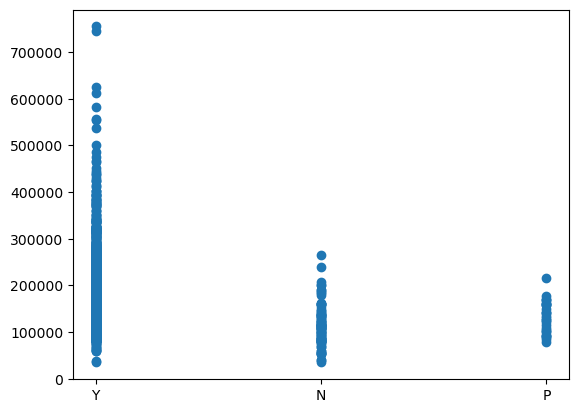

In [92]:
plt.scatter(x = 'PavedDrive', y = 'SalePrice', data = df)

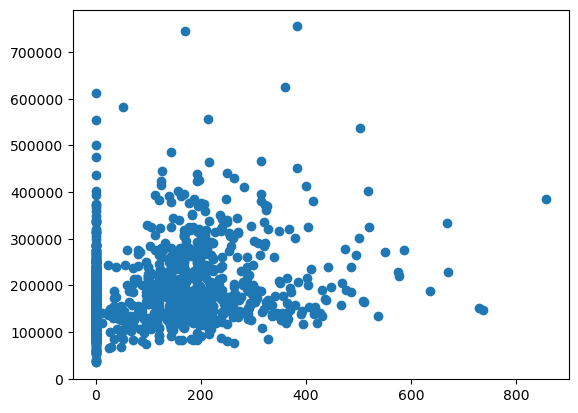

In [93]:
plt.scatter(x = 'WoodDeckSF', y = 'SalePrice', data = df)

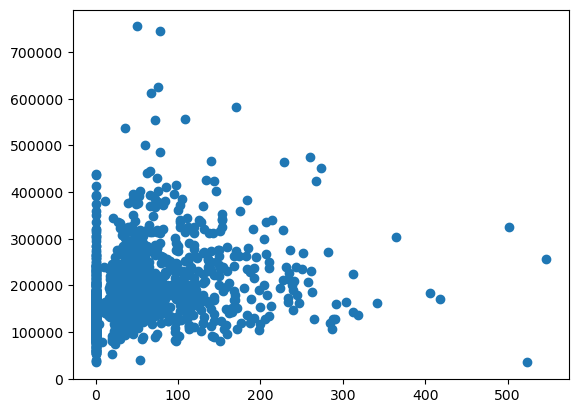

In [94]:
plt.scatter(x = 'OpenPorchSF', y = 'SalePrice', data = df)

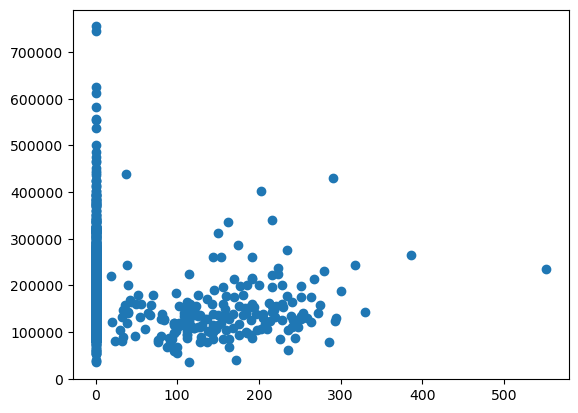

In [95]:
plt.scatter(x = 'EnclosedPorch', y = 'SalePrice', data = df)

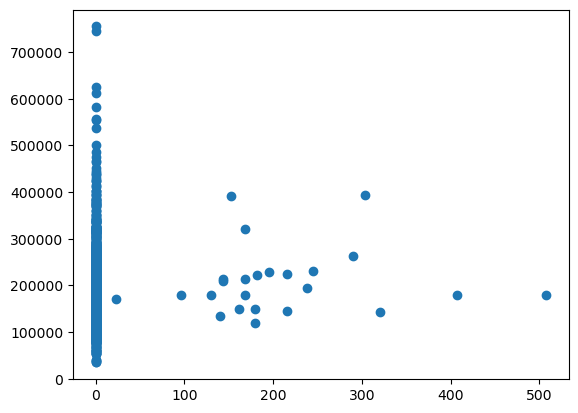

In [96]:
plt.scatter(x = '3SsnPorch', y = 'SalePrice', data = df)

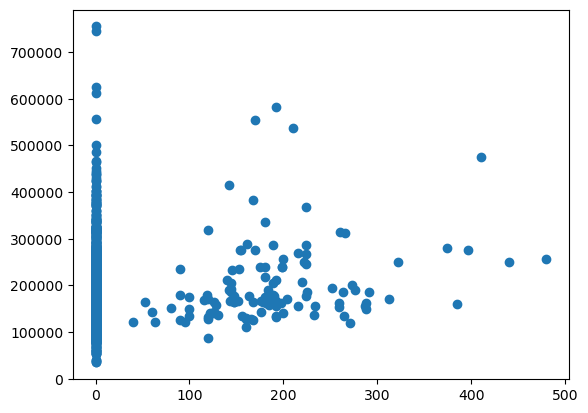

In [97]:
plt.scatter(x = 'ScreenPorch', y = 'SalePrice', data = df)

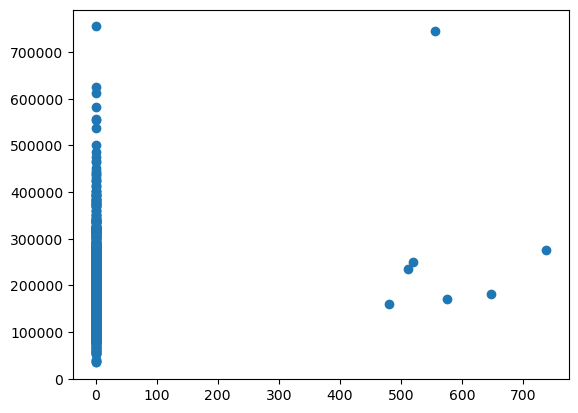

In [98]:
plt.scatter(x = 'PoolArea', y = 'SalePrice', data = df)

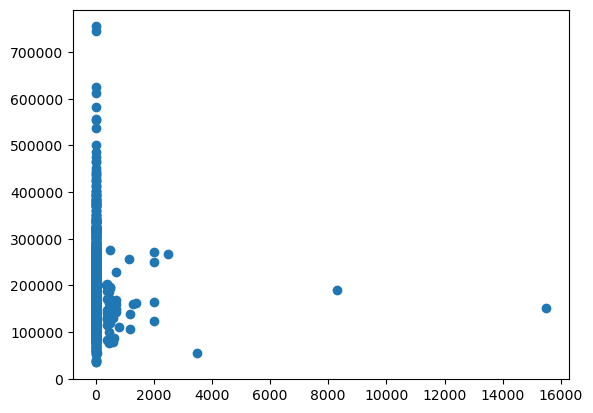

In [99]:
plt.scatter(x = 'MiscVal', y = 'SalePrice', data = df)

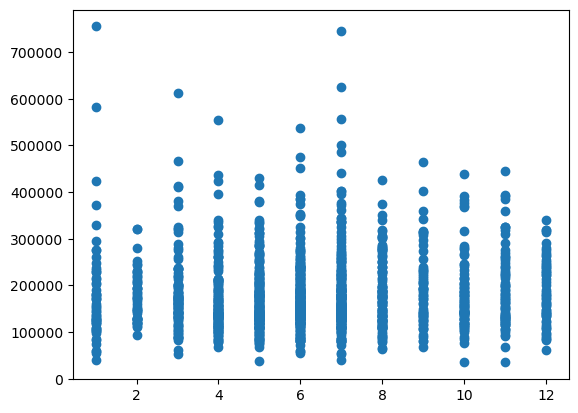

In [100]:
plt.scatter(x = 'MoSold', y = 'SalePrice', data = df)

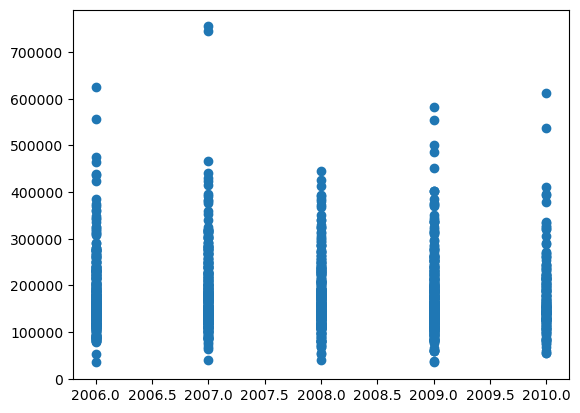

In [101]:
plt.scatter(x = 'YrSold', y = 'SalePrice', data = df)

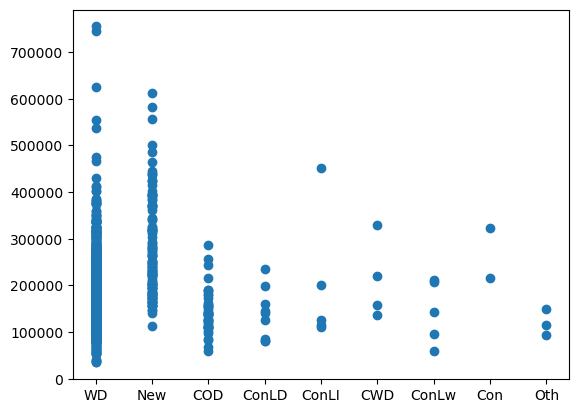

In [102]:
plt.scatter(x = 'SaleType', y = 'SalePrice', data = df)

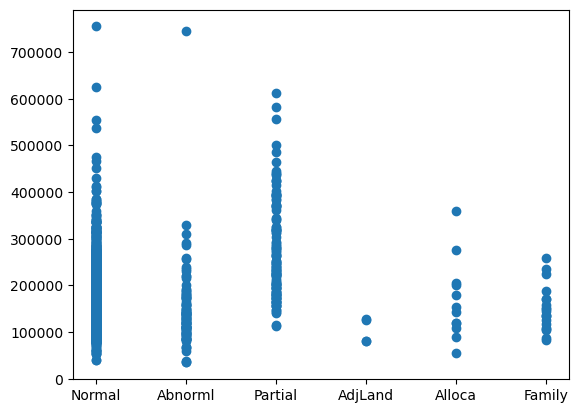

In [103]:
plt.scatter(x = 'SaleCondition', y = 'SalePrice', data = df)

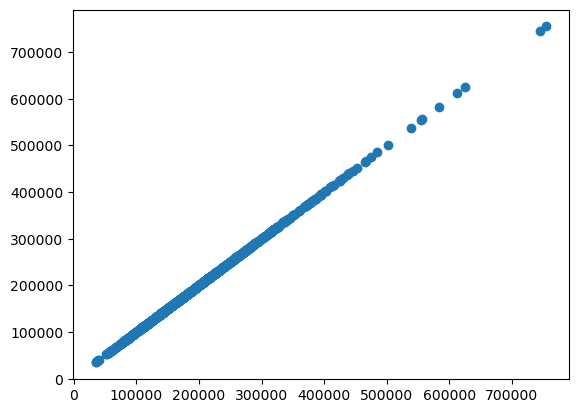

In [104]:
plt.scatter(x = 'SalePrice', y = 'SalePrice', data = df)

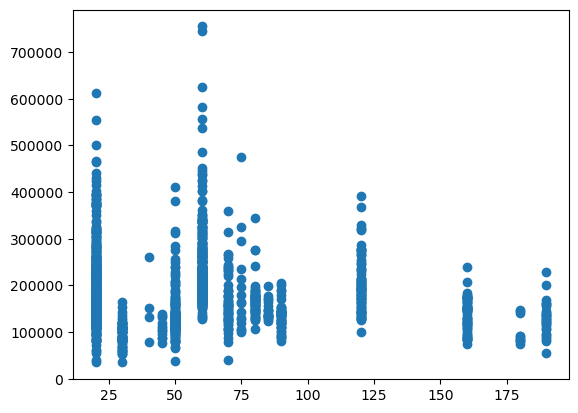

In [105]:
plt.scatter(x = 'MSSubClass', y = 'SalePrice', data = df)

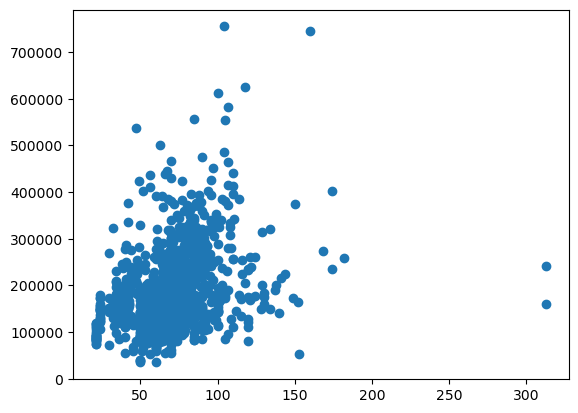

In [106]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df)

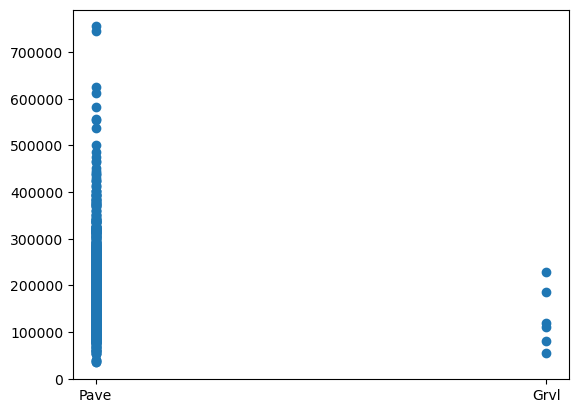

In [107]:
plt.scatter(x = 'Street', y = 'SalePrice', data = df)

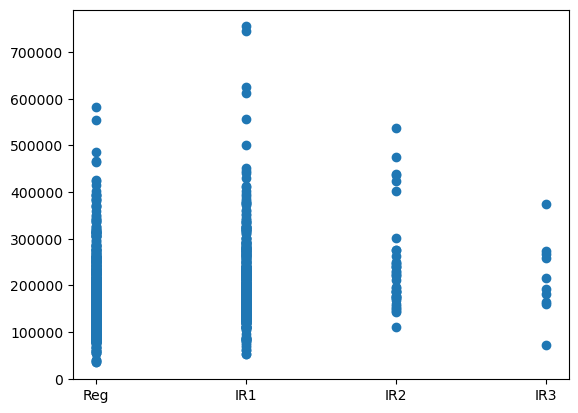

In [108]:
plt.scatter(x = 'LotShape', y = 'SalePrice', data = df)

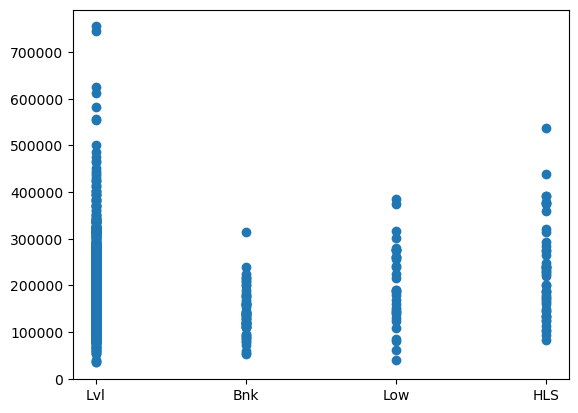

In [109]:
plt.scatter(x = 'LandContour', y = 'SalePrice', data = df)

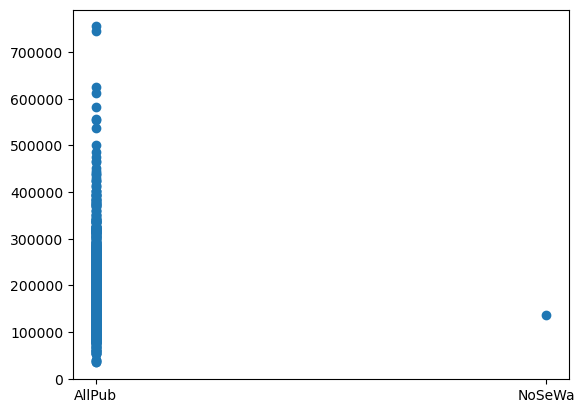

In [110]:
plt.scatter(x = 'Utilities', y = 'SalePrice', data = df)

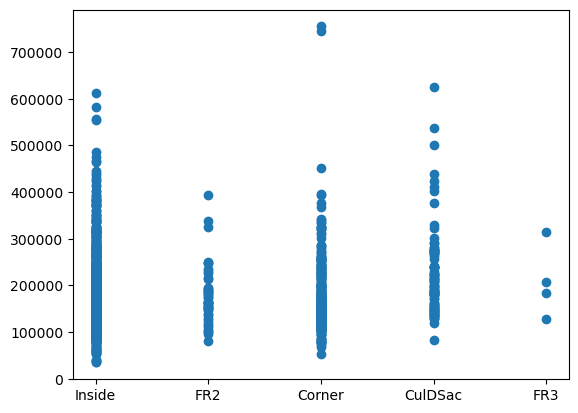

In [111]:
plt.scatter(x = 'LotConfig', y = 'SalePrice', data = df)

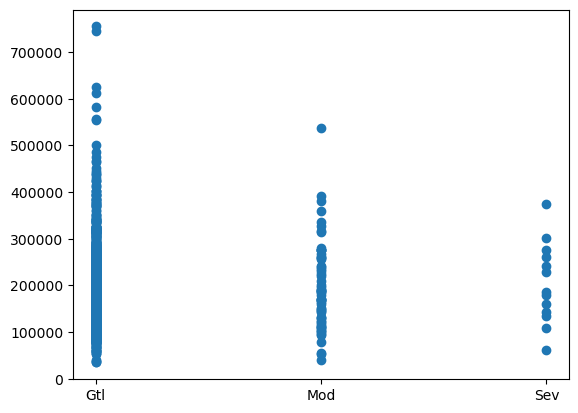

In [112]:
plt.scatter(x = 'LandSlope', y = 'SalePrice', data = df)

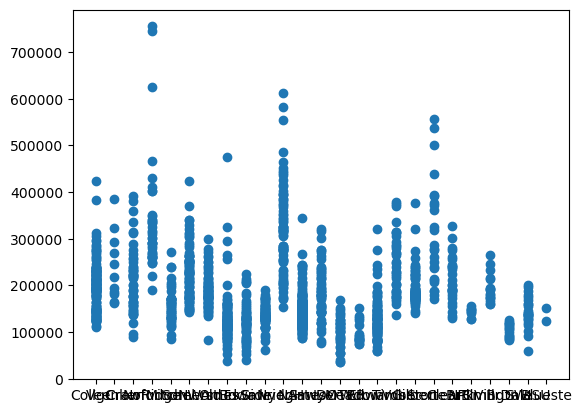

In [113]:
plt.scatter(x = 'Neighborhood', y = 'SalePrice', data = df)

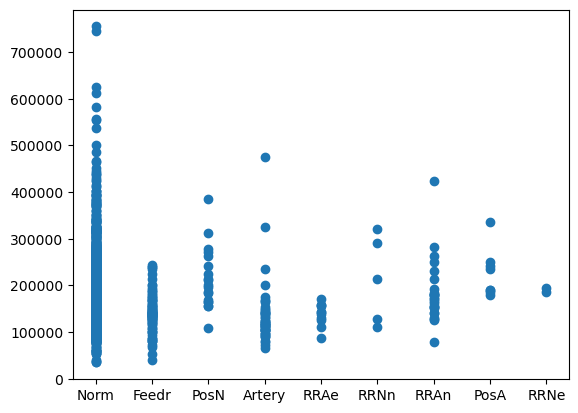

In [114]:
plt.scatter(x = 'Condition1', y = 'SalePrice', data = df)

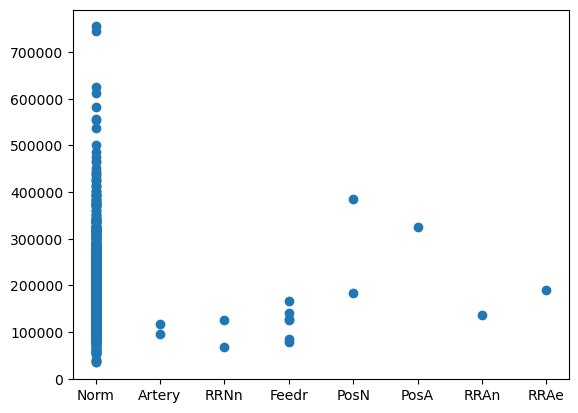

In [115]:
plt.scatter(x = 'Condition2', y = 'SalePrice', data = df)

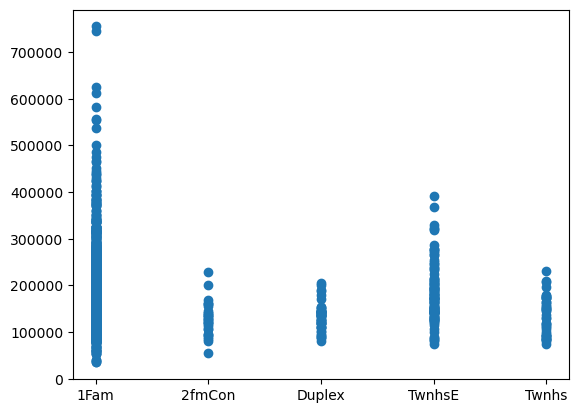

In [116]:
plt.scatter(x = 'BldgType', y = 'SalePrice', data = df)

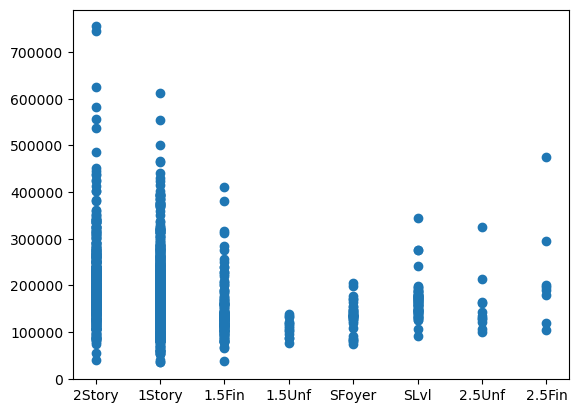

In [117]:
plt.scatter(x = 'HouseStyle', y = 'SalePrice', data = df)

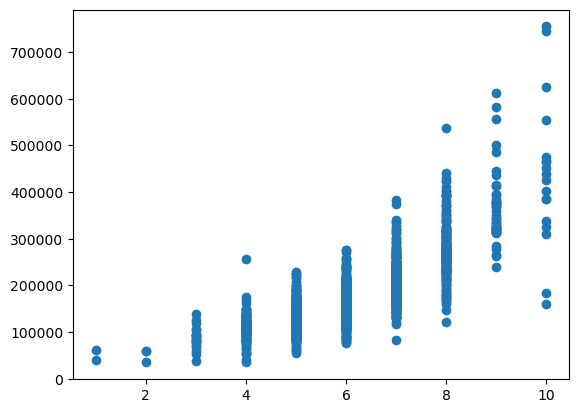

In [118]:
plt.scatter(x = 'OverallQual', y = 'SalePrice', data = df)

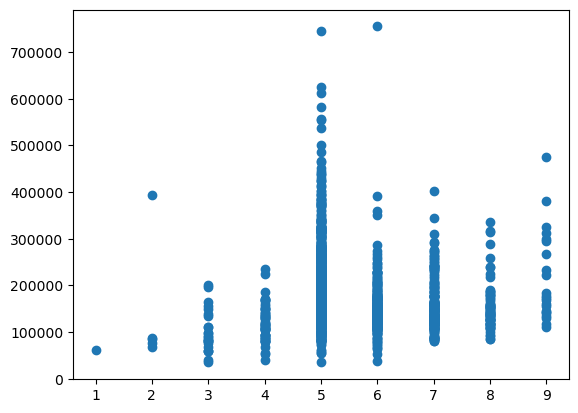

In [119]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data = df)

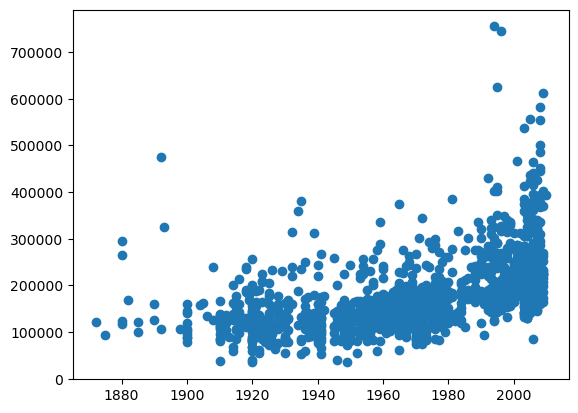

In [120]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = df)

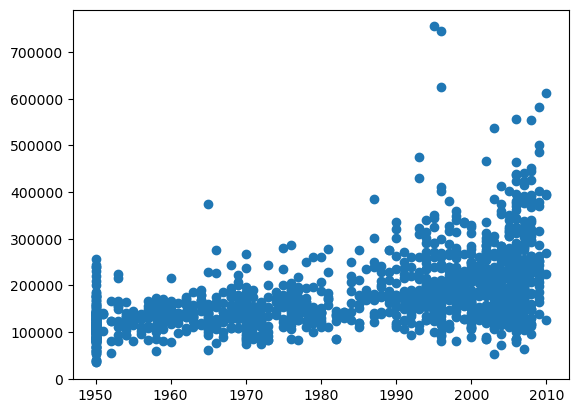

In [121]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df)

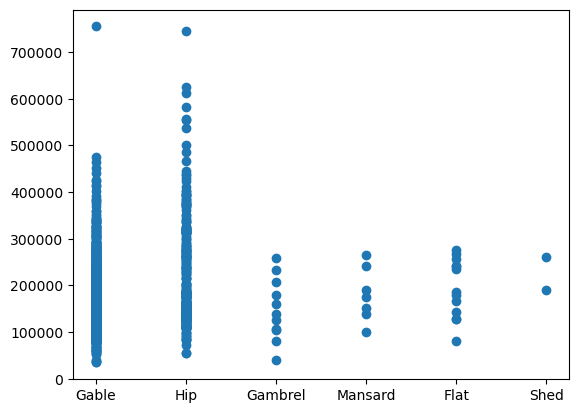

In [122]:
plt.scatter(x = 'RoofStyle', y = 'SalePrice', data = df)

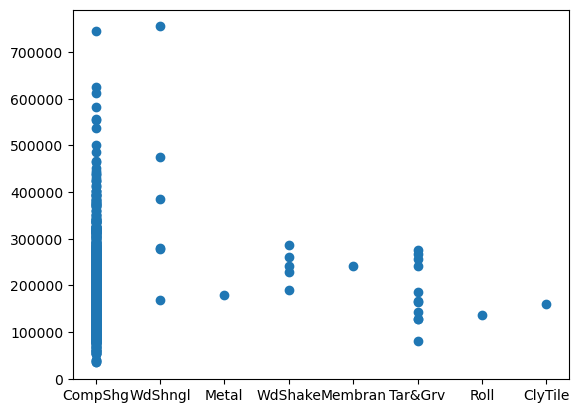

In [123]:
plt.scatter(x = 'RoofMatl', y = 'SalePrice', data = df)

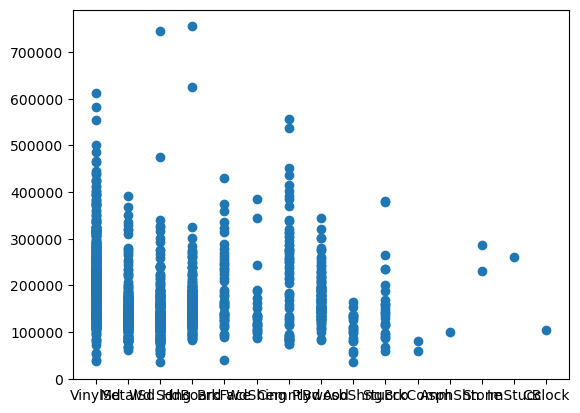

In [124]:
plt.scatter(x = 'Exterior1st', y = 'SalePrice', data = df)

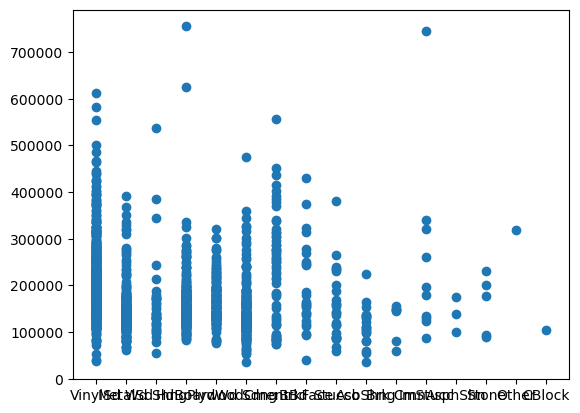

In [125]:
plt.scatter(x = 'Exterior2nd', y = 'SalePrice', data = df)

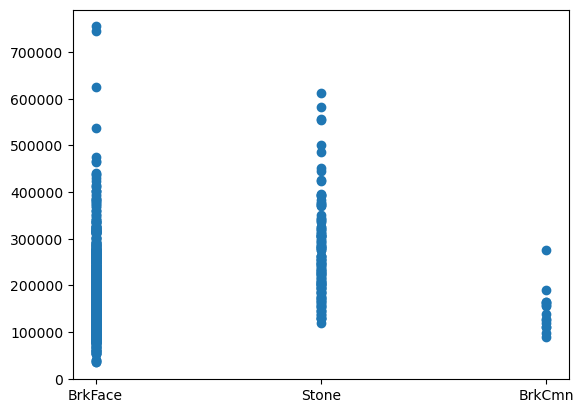

In [126]:
plt.scatter(x = 'MasVnrType', y = 'SalePrice', data = df)

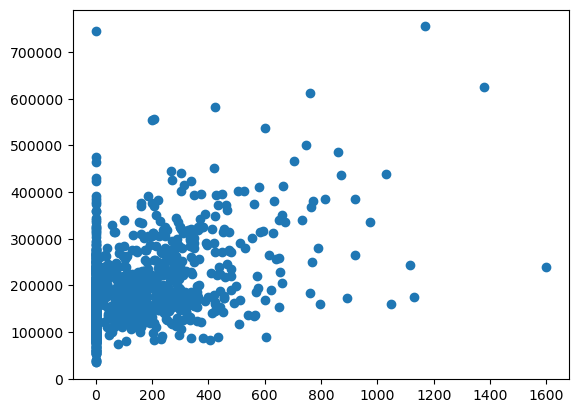

In [127]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df)

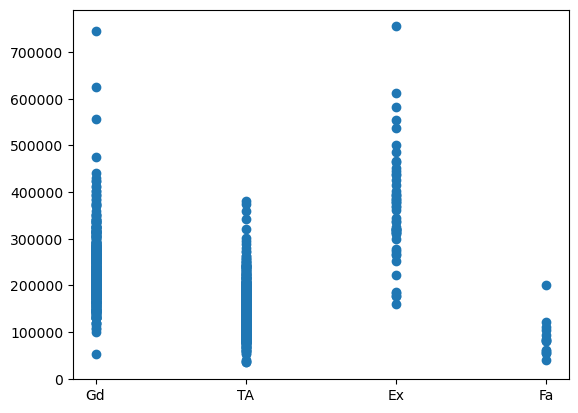

In [128]:
plt.scatter(x = 'ExterQual', y = 'SalePrice', data = df)

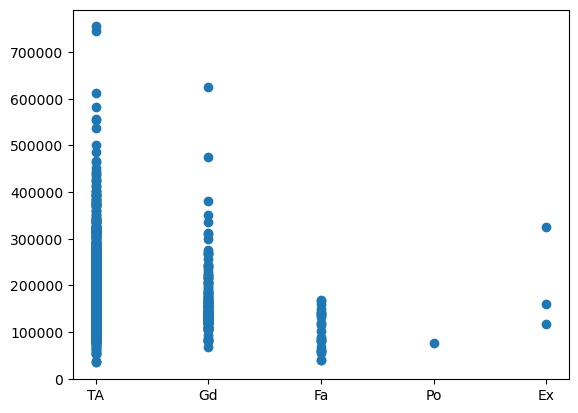

In [129]:
plt.scatter(x = 'ExterCond', y = 'SalePrice', data = df)

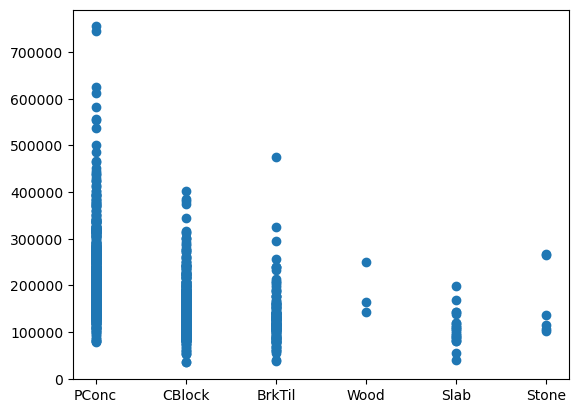

In [130]:
plt.scatter(x = 'Foundation', y = 'SalePrice', data = df)

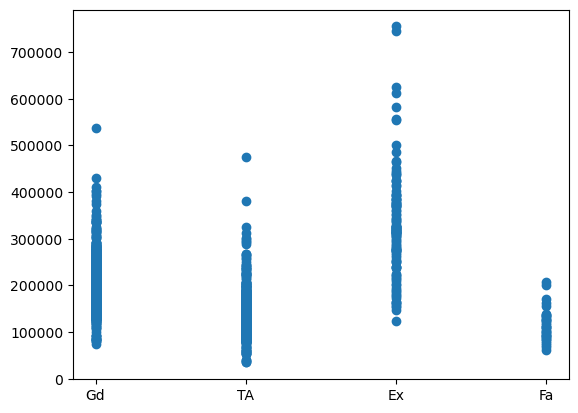

In [131]:
plt.scatter(x = 'BsmtQual', y = 'SalePrice', data = df)

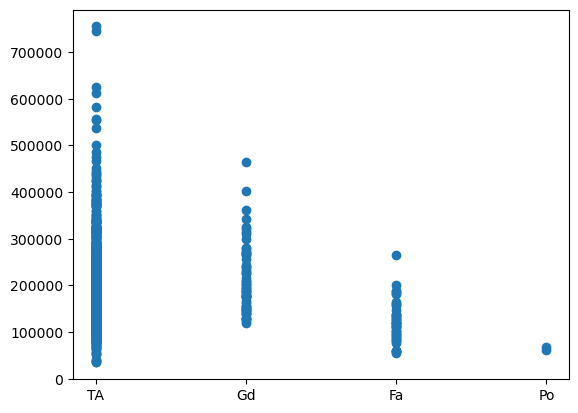

In [132]:
plt.scatter(x = 'BsmtCond', y = 'SalePrice', data = df)

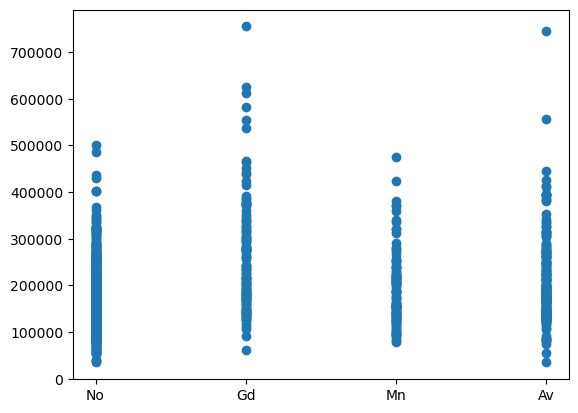

In [133]:
plt.scatter(x = 'BsmtExposure', y = 'SalePrice', data = df)

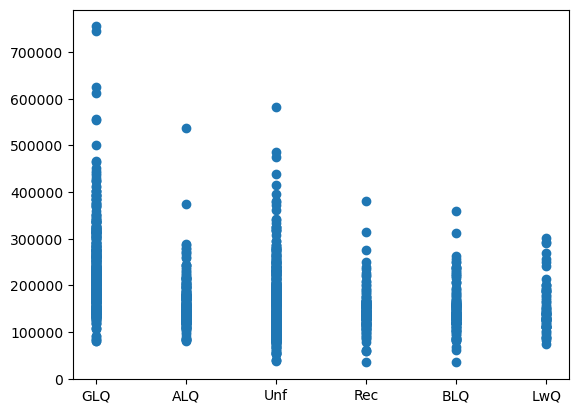

In [134]:
plt.scatter(x = 'BsmtFinType1', y = 'SalePrice', data = df)

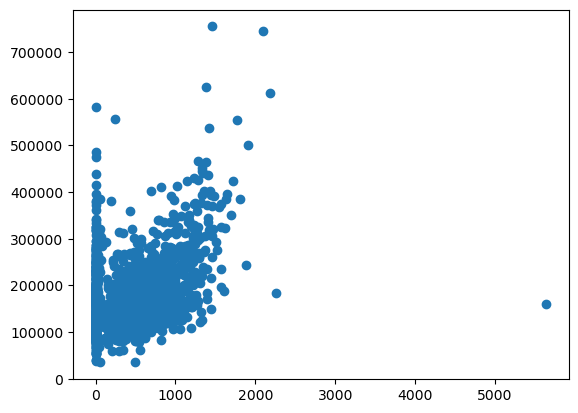

In [135]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = df)

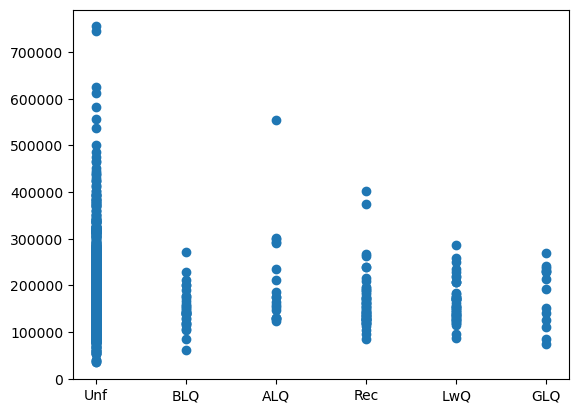

In [136]:
plt.scatter(x = 'BsmtFinType2', y = 'SalePrice', data = df)

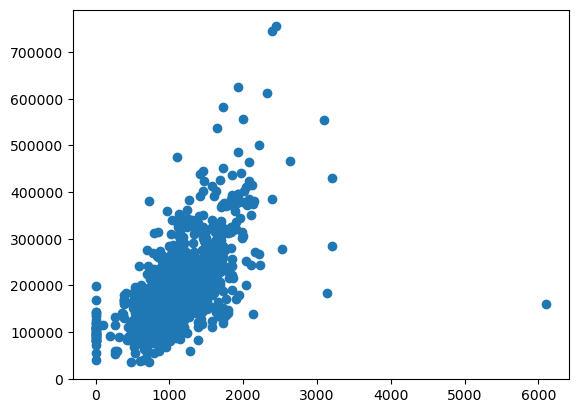

In [137]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df)

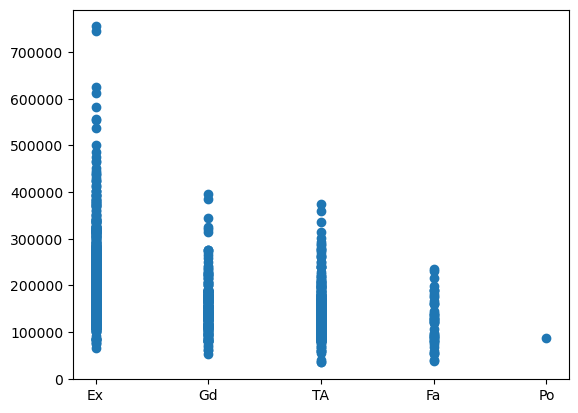

In [138]:
plt.scatter(x = 'HeatingQC', y = 'SalePrice', data = df)

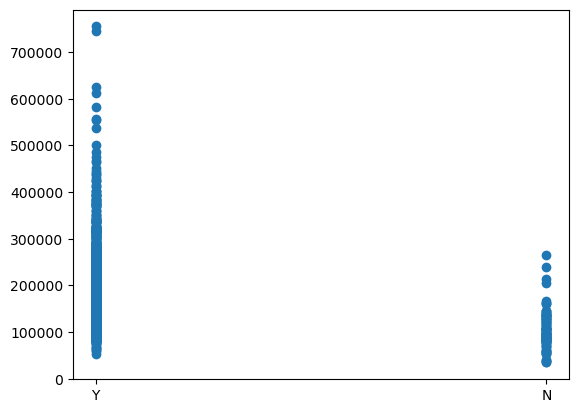

In [139]:
plt.scatter(x = 'CentralAir', y = 'SalePrice', data = df)

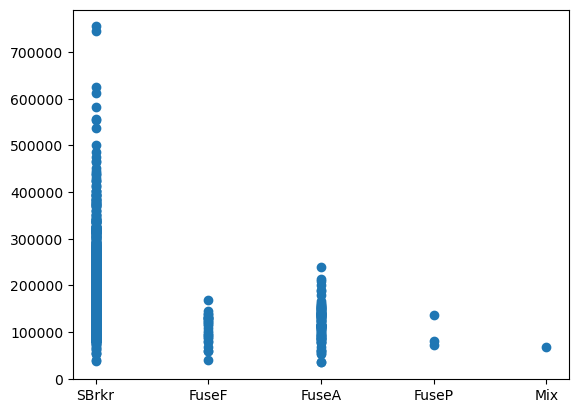

In [140]:
plt.scatter(x = 'Electrical', y = 'SalePrice', data = df)

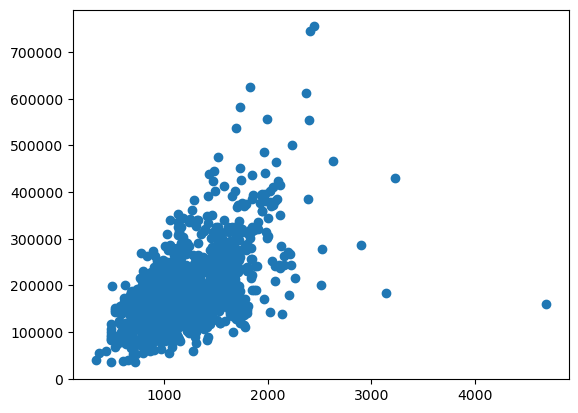

In [141]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = df)

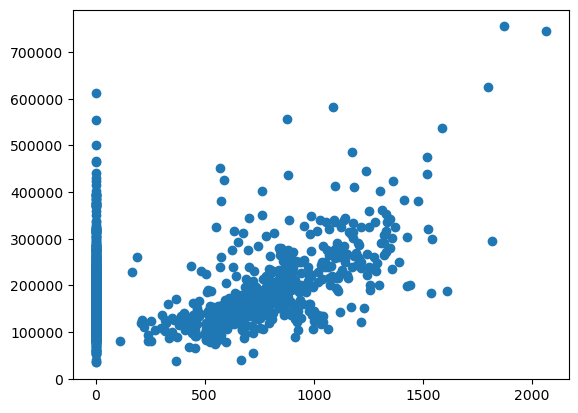

In [142]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = df)

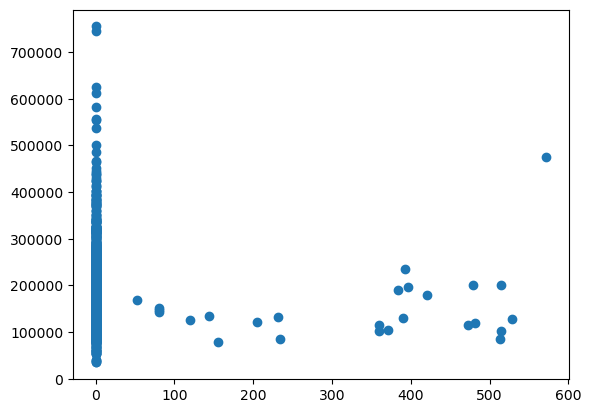

In [143]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = df)

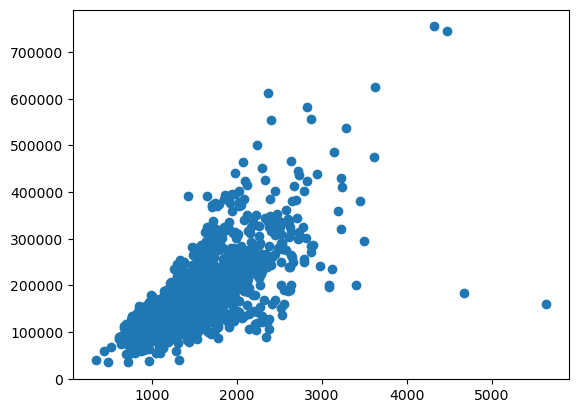

In [144]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df)

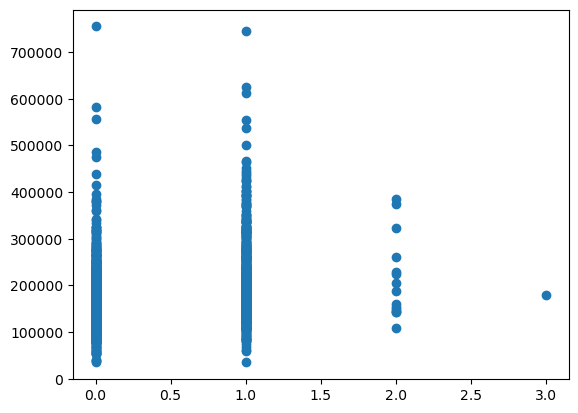

In [145]:
plt.scatter(x = 'BsmtFullBath', y = 'SalePrice', data = df)

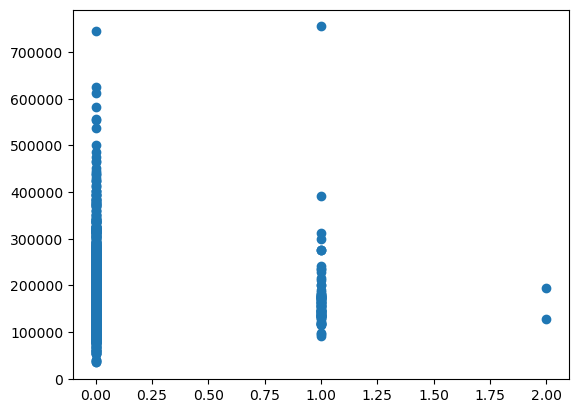

In [146]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = df)

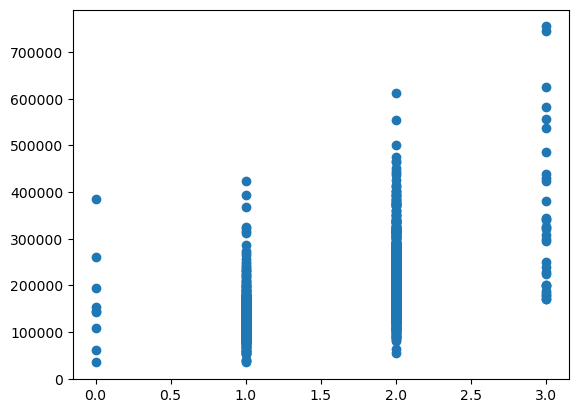

In [147]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data = df)

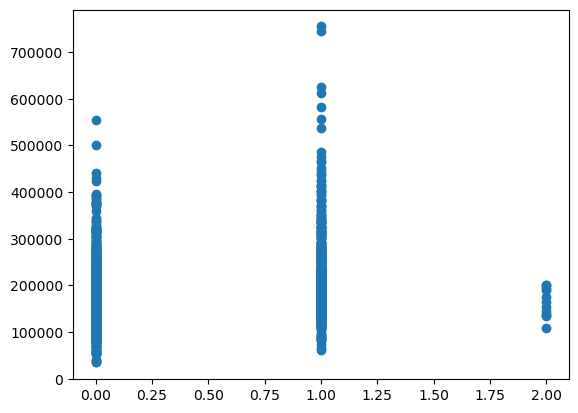

In [148]:
plt.scatter(x = 'HalfBath', y = 'SalePrice', data = df)

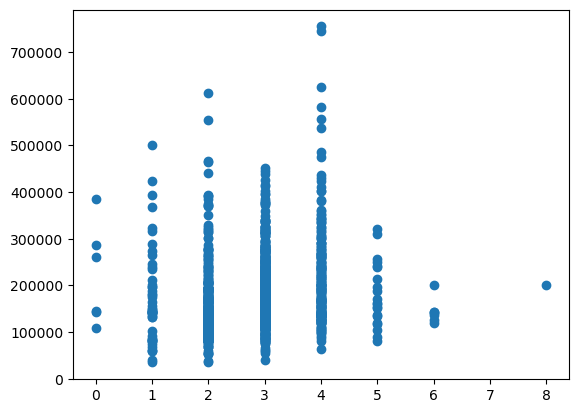

In [149]:
plt.scatter(x = 'BedroomAbvGr', y = 'SalePrice', data = df)

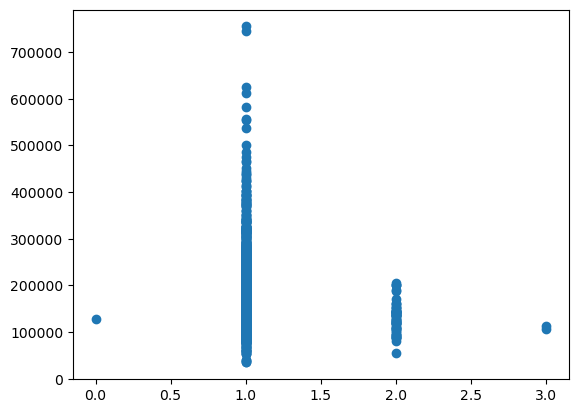

In [150]:
plt.scatter(x = 'KitchenAbvGr', y = 'SalePrice', data = df)

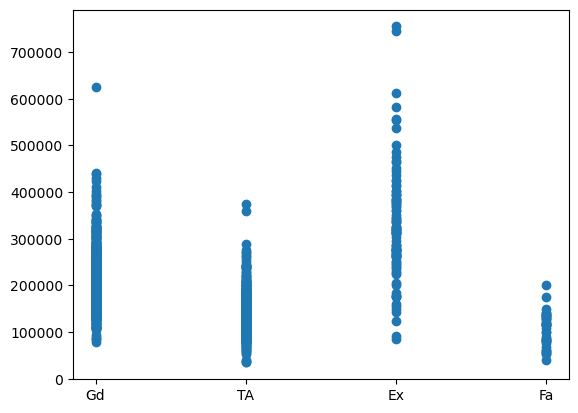

In [151]:
plt.scatter(x = 'KitchenQual', y = 'SalePrice', data = df)

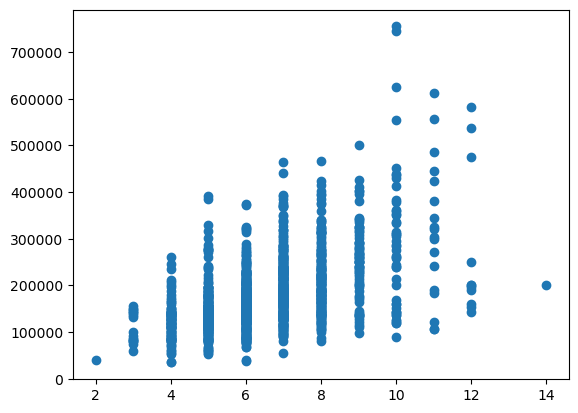

In [152]:
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df)

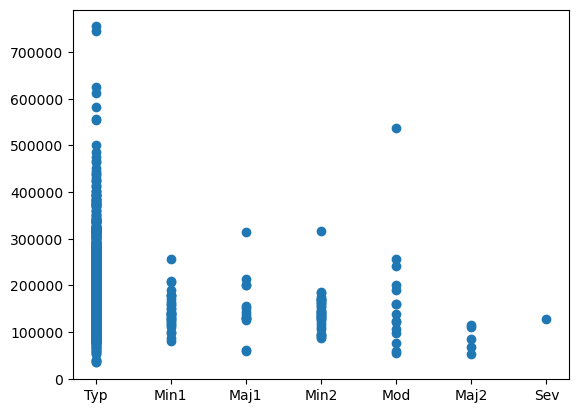

In [153]:
plt.scatter(x = 'Functional', y = 'SalePrice', data = df)

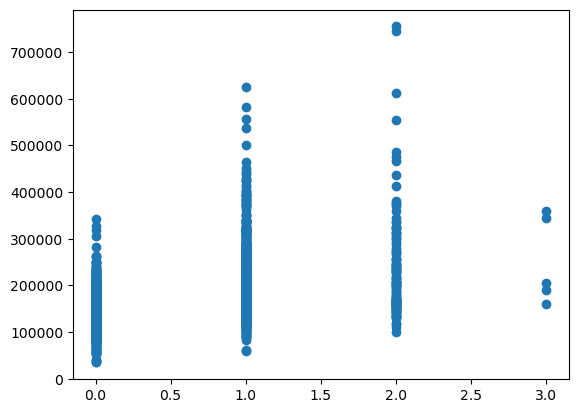

In [154]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data = df)

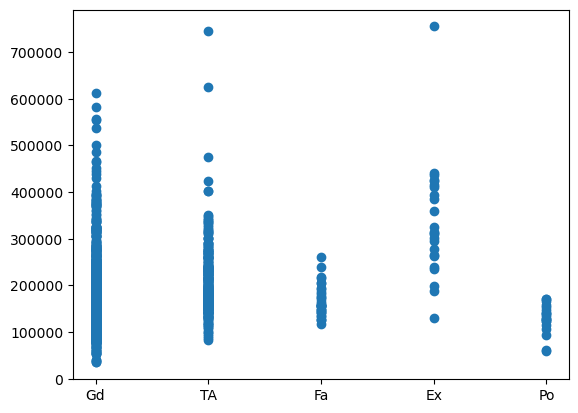

In [155]:
plt.scatter(x = 'FireplaceQu', y = 'SalePrice', data = df)

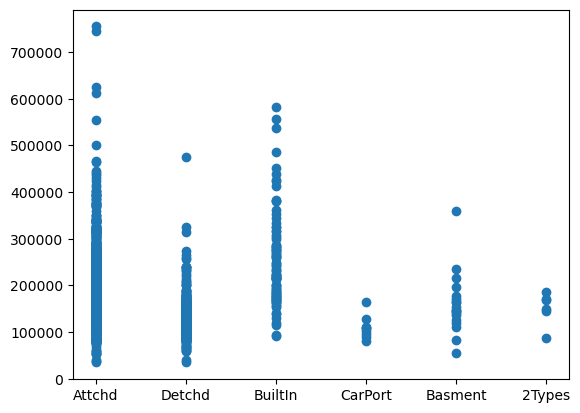

In [156]:
plt.scatter(x = 'GarageType', y = 'SalePrice', data = df)

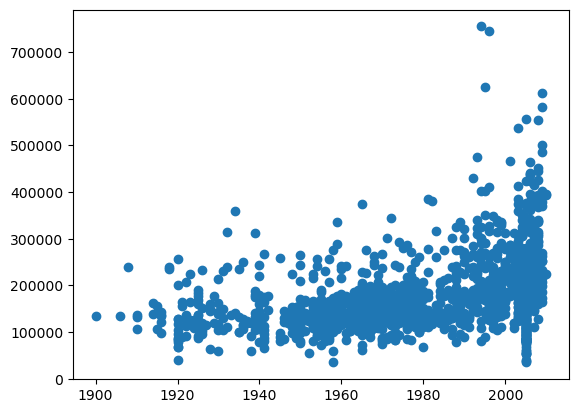

In [157]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = df)

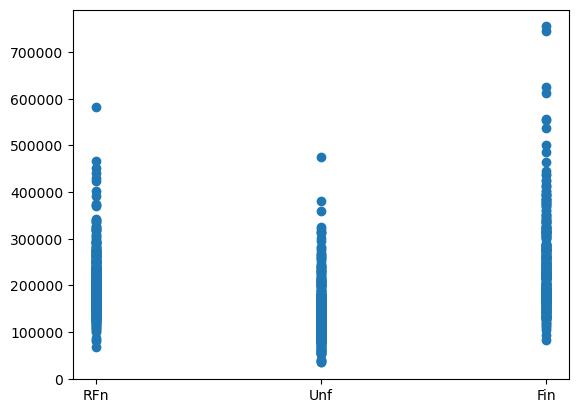

In [158]:
plt.scatter(x = 'GarageFinish', y = 'SalePrice', data = df)

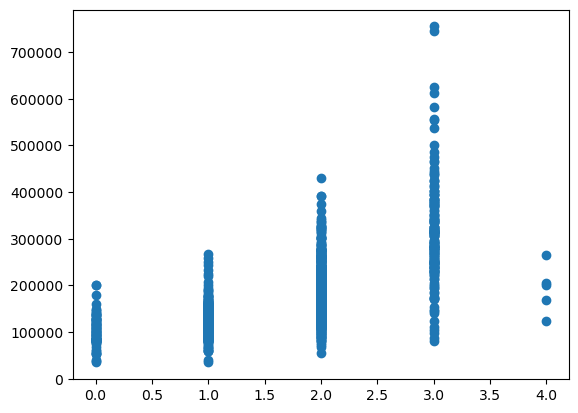

In [159]:
plt.scatter(x = 'GarageCars', y = 'SalePrice', data = df)

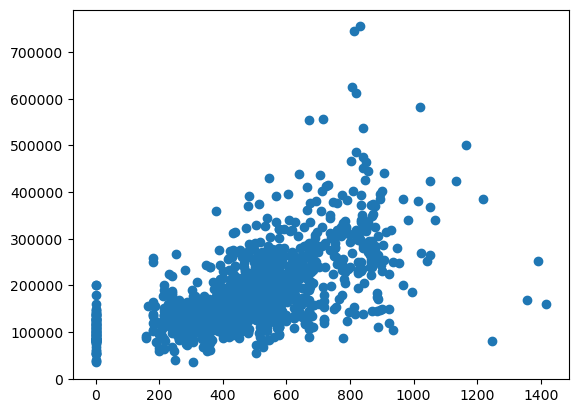

In [160]:
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df)

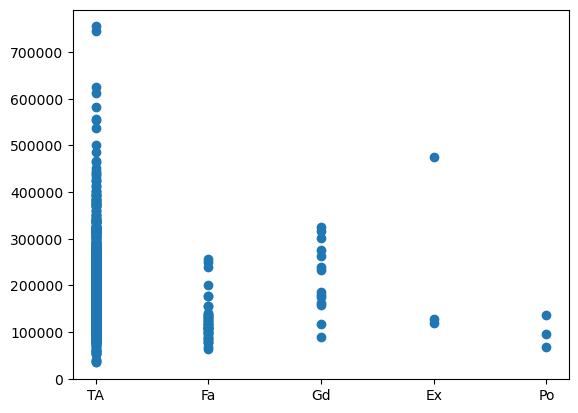

In [161]:
plt.scatter(x = 'GarageQual', y = 'SalePrice', data = df)

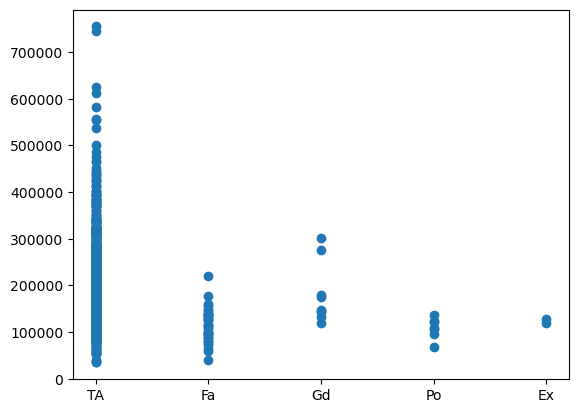

In [162]:
plt.scatter(x = 'GarageCond', y = 'SalePrice', data = df)

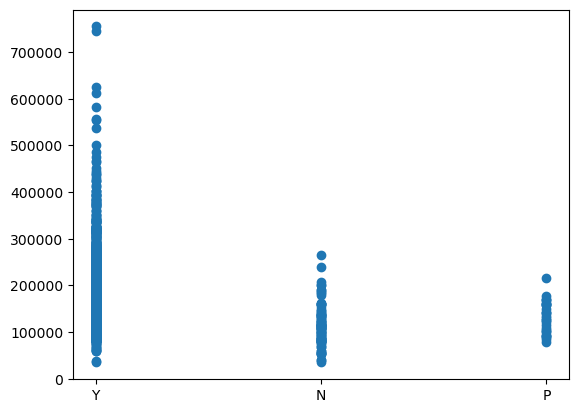

In [163]:
plt.scatter(x = 'PavedDrive', y = 'SalePrice', data = df)

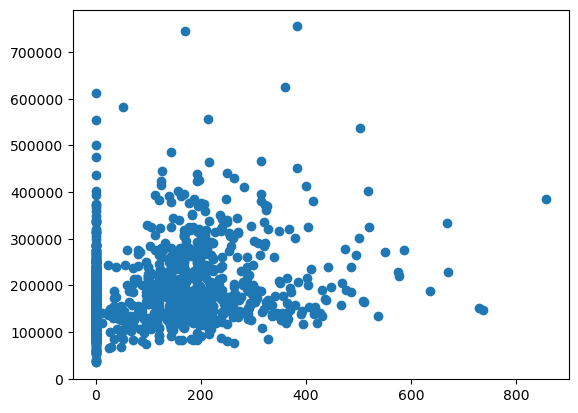

In [164]:
plt.scatter(x = 'WoodDeckSF', y = 'SalePrice', data = df)

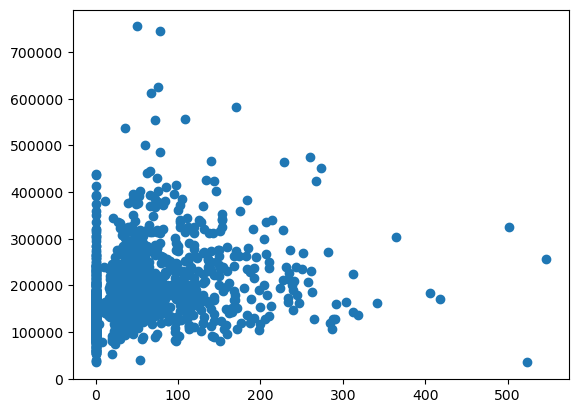

In [165]:
plt.scatter(x = 'OpenPorchSF', y = 'SalePrice', data = df)

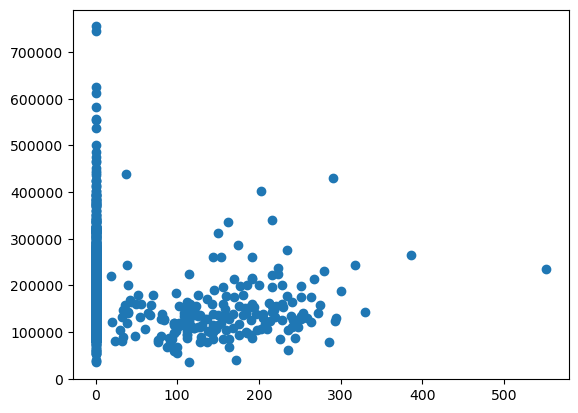

In [166]:
plt.scatter(x = 'EnclosedPorch', y = 'SalePrice', data = df)

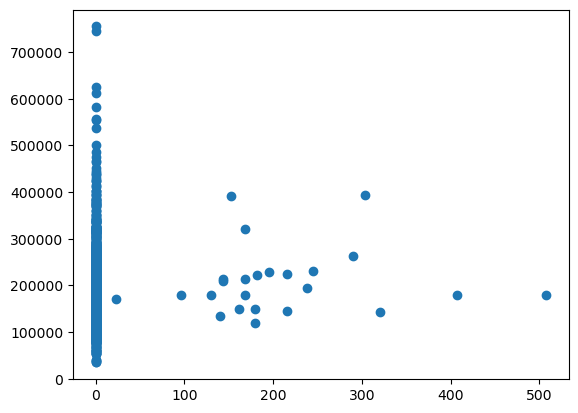

In [167]:
plt.scatter(x = '3SsnPorch', y = 'SalePrice', data = df)

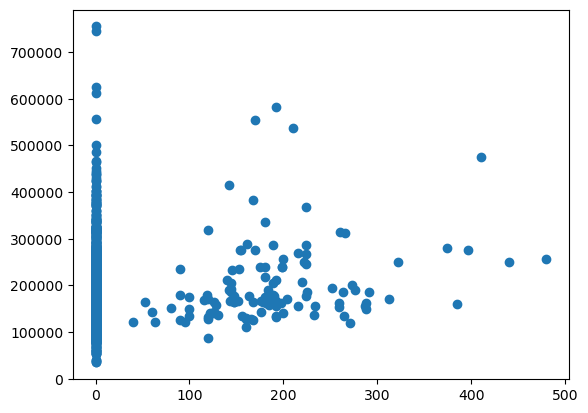

In [168]:
plt.scatter(x = 'ScreenPorch', y = 'SalePrice', data = df)

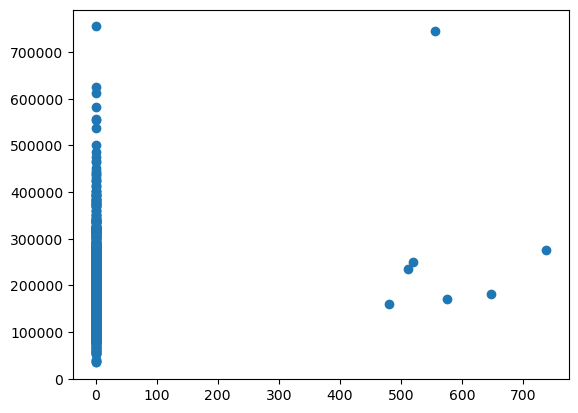

In [169]:
plt.scatter(x = 'PoolArea', y = 'SalePrice', data = df)

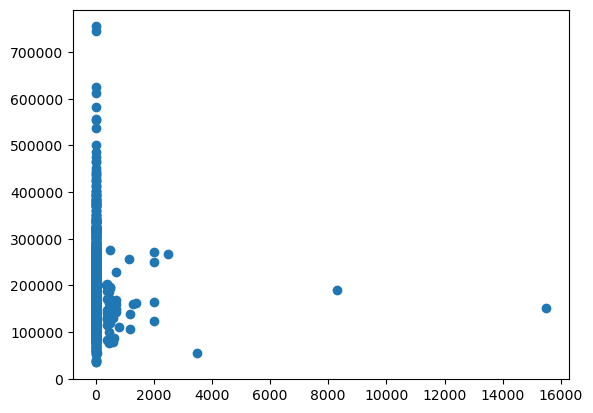

In [170]:
plt.scatter(x = 'MiscVal', y = 'SalePrice', data = df)

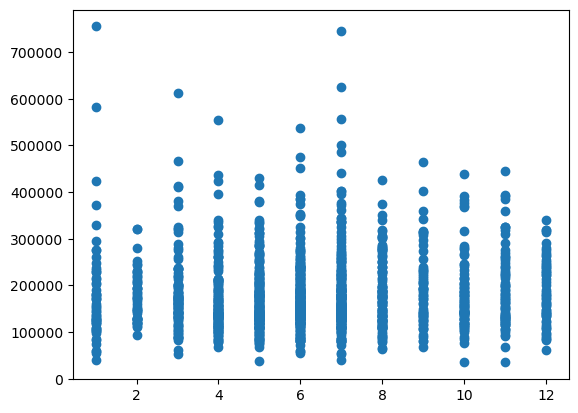

In [171]:
plt.scatter(x = 'MoSold', y = 'SalePrice', data = df)

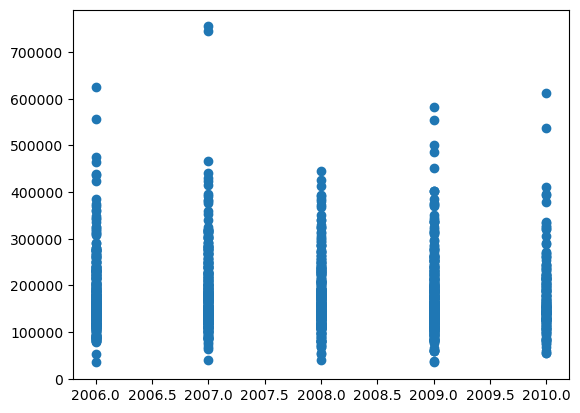

In [172]:
plt.scatter(x = 'YrSold', y = 'SalePrice', data = df)

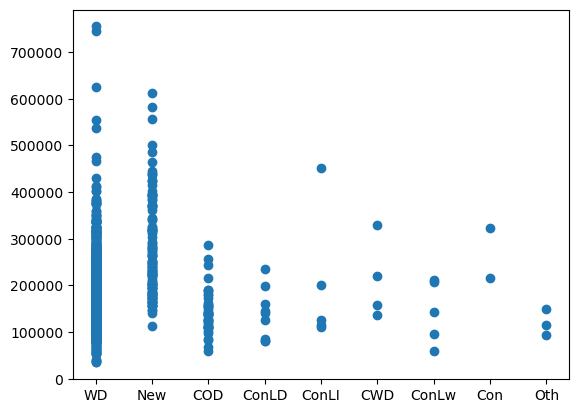

In [173]:
plt.scatter(x = 'SaleType', y = 'SalePrice', data = df)

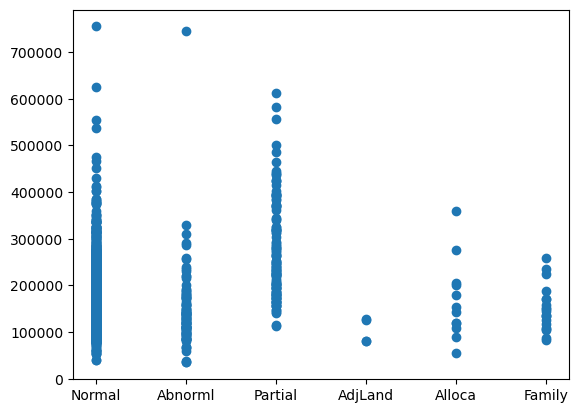

In [174]:
plt.scatter(x = 'SaleCondition', y = 'SalePrice', data = df)

In [175]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

# Polynomial Regression Model

In [176]:
df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [177]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  ...     Fa     Gd     Po  \
0          2003       196.0         706        150  ...  False  False  False   
1          1976         0.0         978        284  ...  False  False  False   
2          2002       162.0         486        434  ...  False  False  False   
3          1970         0.0         216        540  ...  False  False  False   
4          2000       350.0         655        490  ...  False  False  False   

     TA     Fa     Gd     Po    TA      P     Y  
0  True  False  False  False  True  False  True  
1  True  False  False  False  True  False  True  
2  True  False  False  False  True  False  True  
3  True  False  False  False  True  False  True  
4  True  False  False  False  True  False  True  

[5 rows x 235 columns]

In [178]:
target_parameter = np.array(df['SalePrice'])
independant_parameter = np.array(df.loc[:, df.columns != "SalePrice"])

In [179]:
model = LinearRegression().fit(independant_parameter, target_parameter)

In [180]:
model.coef_

array([-3.31773181e+01,  5.93124353e+01,  7.53713761e-01,  6.30578077e+03,
        5.76509142e+03,  3.04815575e+02,  9.36633019e+01,  1.49489460e+01,
        1.04332907e+01, -9.23625418e+00,  2.43045790e+01,  1.78757490e+01,
        3.38459066e+01, -1.82135889e+01,  3.35085793e+01,  6.46530370e+02,
       -5.38713565e+02,  3.85391976e+03,  1.09470938e+03, -3.47609162e+03,
       -1.21884897e+04,  8.78209655e+02,  2.85969137e+03,  4.35085482e+01,
        2.89206528e+03,  1.44417064e+01,  1.33974833e+01,  4.71832911e+00,
        4.64831994e+00,  3.01477014e+01,  2.90044329e+01,  8.38962363e+01,
        1.44072256e-01, -4.58165622e+02, -4.30145460e+02,  3.60435590e+04,
        2.72748200e+04,  2.88864607e+04,  2.43151030e+04,  3.08566311e+04,
        4.00184132e+03,  4.79748652e+03,  1.91017409e+03,  8.68551964e+03,
       -9.37526994e+03,  6.35734574e+03, -2.96493190e+04,  8.84777748e+03,
       -7.71050394e+03, -1.49288158e+04, -1.14696205e+03,  6.44625849e+03,
       -4.45727571e+04,  

In [181]:
model.intercept_

-738151.0604109926

In [182]:
model.score(independant_parameter, target_parameter)

0.9305079107386803

# TEST DATA

In [249]:
test_df = pd.read_csv('test.csv')

In [250]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [251]:
original_test_data = test_df

In [252]:
test_df.drop(['Id', 'Alley','PoolQC', 'Fence','MiscFeature'], axis=1, inplace=True)

In [253]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode(0))
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode(0))
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode()[0])
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mode()[0])
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0])
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['MSSubClass'] = test_df['MSSubClass'].fillna(test_df['MSSubClass'].mode()[0])

<Axes: >

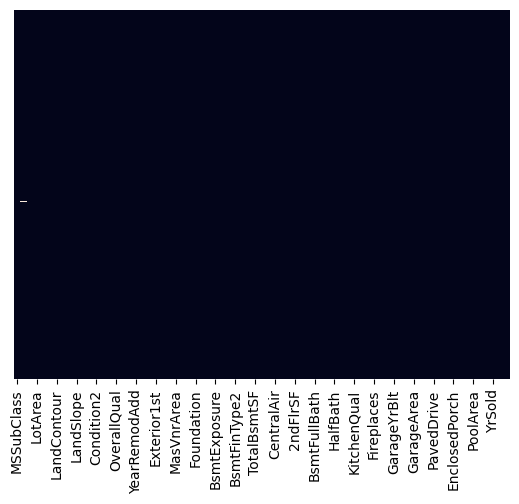

In [254]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

In [255]:
def category_onehot_multcols(multcolumns):
    final_df = test_df
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [256]:
test_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [257]:
independant_parameter = np.array(test_df.loc[:, test_df.columns != "SalePrice"])

In [258]:
independant_parameter

array([[20, 80.0, 11622, ..., True, False, True],
       [20, 81.0, 14267, ..., True, False, True],
       [60, 74.0, 13830, ..., True, False, True],
       ...,
       [20, 160.0, 20000, ..., True, False, True],
       [85, 62.0, 10441, ..., True, False, True],
       [60, 74.0, 9627, ..., True, False, True]], dtype=object)

In [ ]:
model.predict(independant_parameter)